In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [19]:
df = pd.read_csv('fifa_19.csv',encoding = 'latin1')
df.head()

Unnamed: 0      ID               Name   Age  \
0           0  158023           L. Messi  31.0   
1           1   20801  Cristiano Ronaldo  33.0   
2           2  190871          Neymar Jr  26.0   
3           3  193080             De Gea  27.0   
4           4  192985       K. De Bruyne  27.0   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png     94.0         94   
1  https://cdn.sofifa.org/flags/38.png     94.0         94   
2  https://cdn.sofifa.org/flags/54.png     92.0         93   
3  https://cdn.sofifa.org/flags/45.png     91.0         93   
4   https://cdn.sofifa.org/flags/7.png     91.0         92   

                  Club  ... Composure Marking StandingTackle  SlidingTackle  \
0         FC Barcelona  ...      96.0    33.0           28.0           26.0   
1             Juventus  ...      95.0    28.0           31.0           23.0   
2  Paris Saint-Germain  ...      94.0    27.0           24.0           33.0   
3    Manchester United  ...      68.0    15.0           21.0           13.0   
4      Manchester City  ...      88.0    68.0           58.0           51.0   

  GKDiving  GKHandling  GKKicking  GKPositioning GKReflexes Release Clause  
0      6.0        11.0       15.0           14.0        8.0        226.5M  
1      7.0        11.0       15.0           14.0       11.0        127.1M  
2      9.0         9.0       15.0           15.0       11.0        228.1M  
3     90.0        85.0       87.0           88.0       94.0        138.6M  
4     15.0        13.0        5.0           10.0       13.0        196.4M  

[5 rows x 89 columns]

In [20]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  1
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [21]:
#keeping only the most relevant features
data_df = df[['Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
            'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
            'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions',
            'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
            'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes','Position']]
data_df.head()

Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0       95.0             70.0          90.0     86.0       97.0   93.0   
1       94.0             89.0          81.0     87.0       88.0   81.0   
2       87.0             62.0          84.0     84.0       96.0   88.0   
3       13.0             21.0          50.0     13.0       18.0   21.0   
4       82.0             55.0          92.0     82.0       86.0   85.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  ...  Composure  \
0        94.0         87.0         96.0          91.0  ...       96.0   
1        76.0         77.0         94.0          89.0  ...       95.0   
2        87.0         78.0         95.0          94.0  ...       94.0   
3        19.0         51.0         42.0          57.0  ...       68.0   
4        83.0         91.0         91.0          78.0  ...       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   
3     15.0            21.0           13.0      90.0        85.0       87.0   
4     68.0            58.0           51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes  Position  
0           14.0         8.0        RF  
1           14.0        11.0        ST  
2           15.0        11.0        LW  
3           88.0        94.0        GK  
4           10.0        13.0       RCM  

[5 rows x 34 columns]

In [22]:
#removing null values
data_df = data_df.dropna()
data_df.isnull().sum()

Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
GKDiving           0
GKHandling         0
GKKicking          0
GKPositioning      0
GKReflexes         0
Position           0
dtype: int64

In [24]:
#grouping the sub-positions together
Goalkeeper = ["GK"]
Forward_Player = ["ST", "LW", "RW", "LF", "RF", "RS","LS", "CF"]
Midfielder_Player = ["CM", "RCM", "LCM", "CDM", "RDM", "LDM", "CAM", "LAM", "RAM", "RM", "LM"]
Defender_Player = ["CB", "RCB", "LCB", "LWB", "RWB", "LB", "RB"]
def target_variable_changing(x:str):
    x = x.upper()
    if x in Goalkeeper:
        return "Goalkeeper"
    elif x in Forward_Player:
        return "Forward"
    elif x in Midfielder_Player:
        return "Midfielder"
    elif x in Defender_Player:
        return "Defender"

In [25]:
data_df['Position'] = data_df['Position'].apply(target_variable_changing)
data_df.head()

Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
0       95.0             70.0          90.0     86.0       97.0   93.0   
1       94.0             89.0          81.0     87.0       88.0   81.0   
2       87.0             62.0          84.0     84.0       96.0   88.0   
3       13.0             21.0          50.0     13.0       18.0   21.0   
4       82.0             55.0          92.0     82.0       86.0   85.0   

   FKAccuracy  LongPassing  BallControl  Acceleration  ...  Composure  \
0        94.0         87.0         96.0          91.0  ...       96.0   
1        76.0         77.0         94.0          89.0  ...       95.0   
2        87.0         78.0         95.0          94.0  ...       94.0   
3        19.0         51.0         42.0          57.0  ...       68.0   
4        83.0         91.0         91.0          78.0  ...       88.0   

   Marking  StandingTackle  SlidingTackle  GKDiving  GKHandling  GKKicking  \
0     33.0            28.0           26.0       6.0        11.0       15.0   
1     28.0            31.0           23.0       7.0        11.0       15.0   
2     27.0            24.0           33.0       9.0         9.0       15.0   
3     15.0            21.0           13.0      90.0        85.0       87.0   
4     68.0            58.0           51.0      15.0        13.0        5.0   

   GKPositioning  GKReflexes    Position  
0           14.0         8.0     Forward  
1           14.0        11.0     Forward  
2           15.0        11.0     Forward  
3           88.0        94.0  Goalkeeper  
4           10.0        13.0  Midfielder  

[5 rows x 34 columns]

In [26]:
#one-hot encoding the classes 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
one_hot_encoded_target = one_hot_encoder.fit_transform(data_df[['Position']])
one_hot_encoded_target_df = pd.DataFrame(one_hot_encoded_target.toarray(), columns=one_hot_encoder.get_feature_names_out(['Position']))
one_hot_encoded_target_df.head()

Position_Defender  Position_Forward  Position_Goalkeeper  \
0                0.0               1.0                  0.0   
1                0.0               1.0                  0.0   
2                0.0               1.0                  0.0   
3                0.0               0.0                  1.0   
4                0.0               0.0                  0.0   

   Position_Midfielder  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  1.0

In [34]:
X = data_df.drop('Position', axis=1)
y = one_hot_encoded_target_df
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
#training the models using 4 for-loops
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import optimizers
from tensorflow.keras.metrics import Precision, Recall

num_features = X_train.shape[1] 

epochs = [10, 20, 30]
activations = ['sigmoid', 'relu']
learning_rates = [0.1, 0.01, 0.001]
layers = [1, 2, 3]
results = []
plot_data = []

for layer in layers:
    for activation in activations:
        for epoch in epochs:
            for learning_rate in learning_rates:
                model = Sequential()
                model.add(Input(shape=(num_features,), name='input'))
                if layer == 1:
                    model.add(Dense(128, activation=activation, name='hl1'))  
                elif layer == 2:
                    model.add(Dense(64, activation=activation, name='hl2'))  
                else:
                    model.add(Dense(32, activation=activation, name='hl3'))  
                model.add(Dense(4, activation='softmax', name='output'))  

                opt = optimizers.Adam(learning_rate=learning_rate)
                model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

                history = model.fit(X_train, Y_train, epochs=epoch, batch_size=32, validation_split=20/80, verbose=0)

                plot_data.append({
                    'layer': layer,
                    'activation': activation,
                    'epochs': epoch,
                    'learning_rate': learning_rate,
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss'],
                    'train_accuracy': history.history.get('accuracy', []),
                    'val_accuracy': history.history.get('val_accuracy', [])
                })

                loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, batch_size=32)
        
                results.append([layer, activation, epoch, learning_rate, loss, accuracy, precision, recall])

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3118 - loss: 1.6750 - precision_5: 0.3118 - recall_5: 0.3118
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6090 - loss: 0.5784 - precision_6: 0.6097 - recall_6: 0.6072
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8696 - loss: 0.2928 - precision_7: 0.8698 - recall_7: 0.8657
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1767 - loss: 1.6091 - precision_8: 0.0000e+00 - recall_8: 0.0000e+00
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.4594 - precision_9: 0.8177 - recall_9: 0.8177
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8680 - loss: 0.3056 - precision_10: 0.8711 - recall_10: 0.8661
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4260 - loss: 1.5801 - precision_11: 0.4260 - recall_11: 0.4260
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6001 - loss: 0.6536 - precision_12: 0.6001 - recall_12: 0.6001
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.8674 - loss: 0.3069

In [40]:
from tabulate import tabulate
headers = ['Layers', 'Activation', 'Epochs', 'Learning Rate', 'Loss', 'Accuracy', 'Precision', 'Recall']
print(tabulate(results, headers=headers, tablefmt='grid'))

+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|   Layers | Activation   |   Epochs |   Learning Rate |     Loss |   Accuracy |   Precision |   Recall |
+==========+==============+==========+=================+==========+============+=============+==========+
|        1 | sigmoid      |       10 |           0.1   | 1.68184  |   0.310193 |    0.310193 | 0.310193 |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       10 |           0.01  | 0.589954 |   0.598898 |    0.599779 | 0.597796 |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       10 |           0.001 | 0.297237 |   0.871074 |    0.872647 | 0.86832  |
+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|        1 | sigmoid      |       20 |        

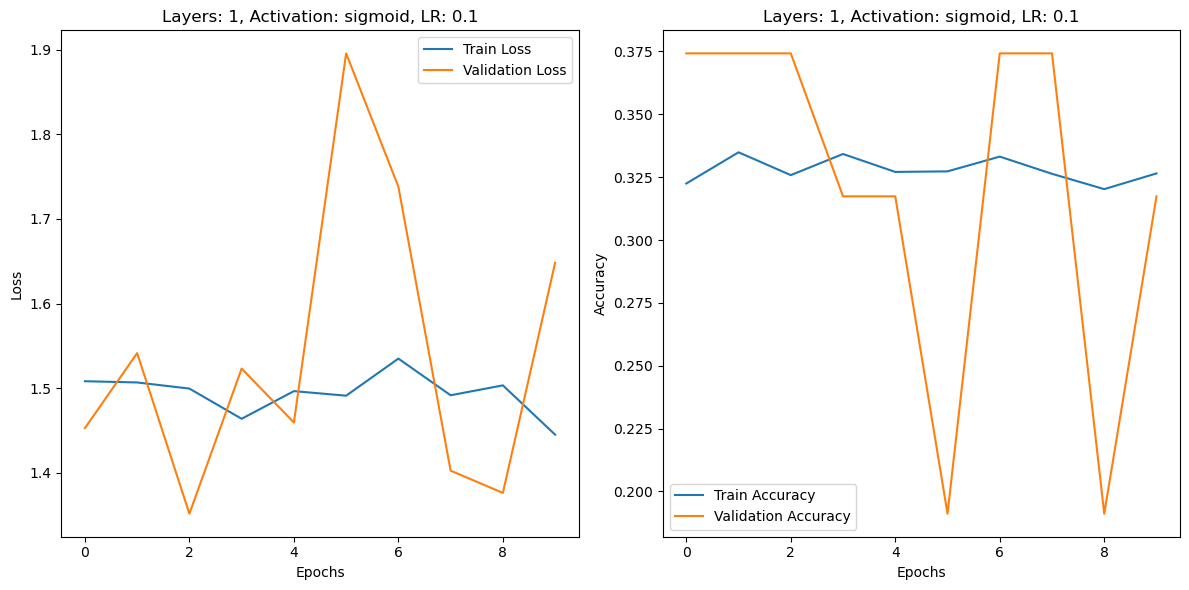

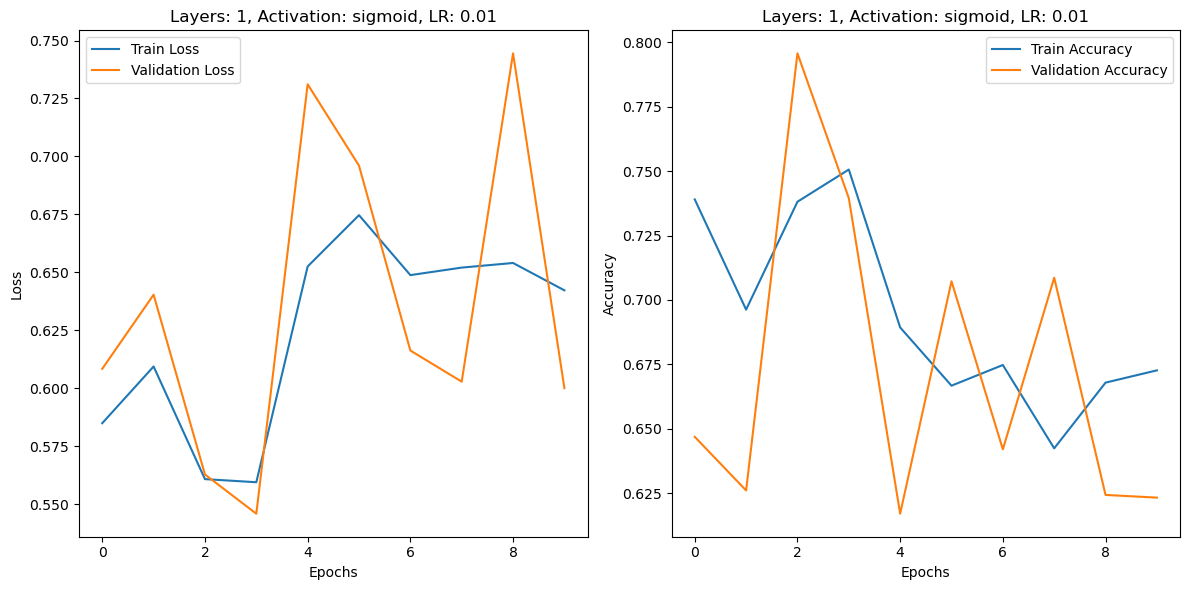

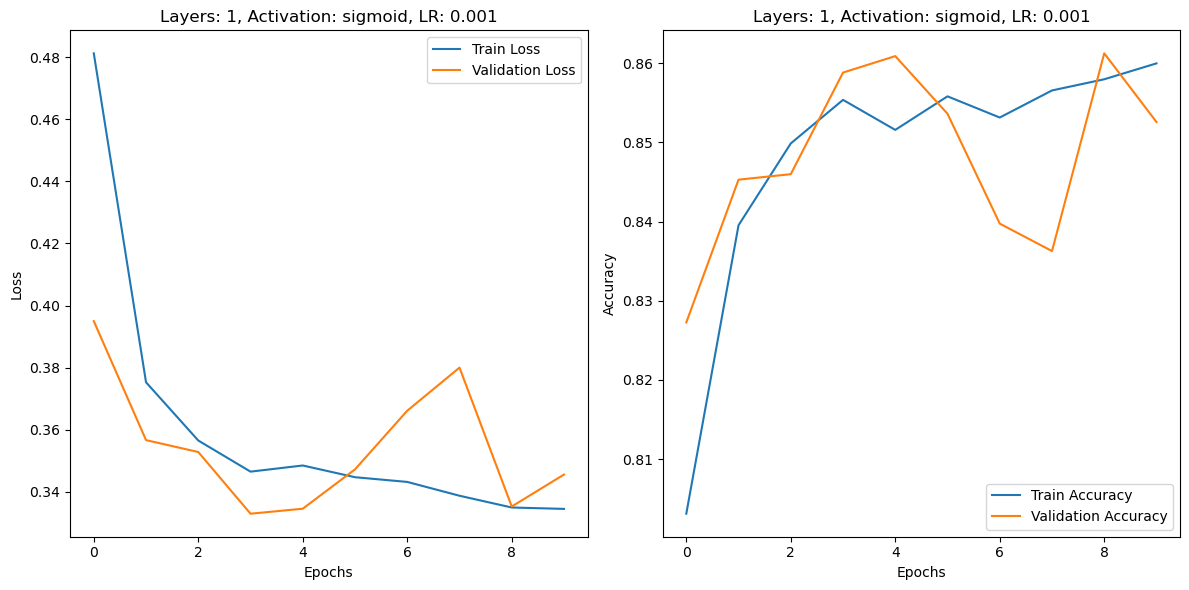

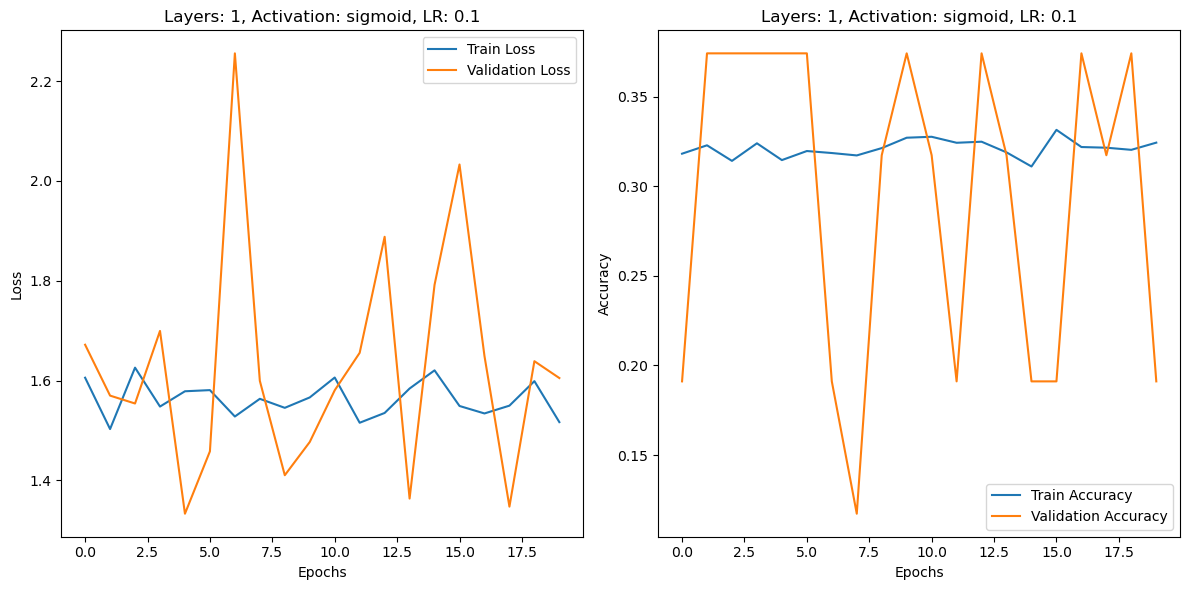

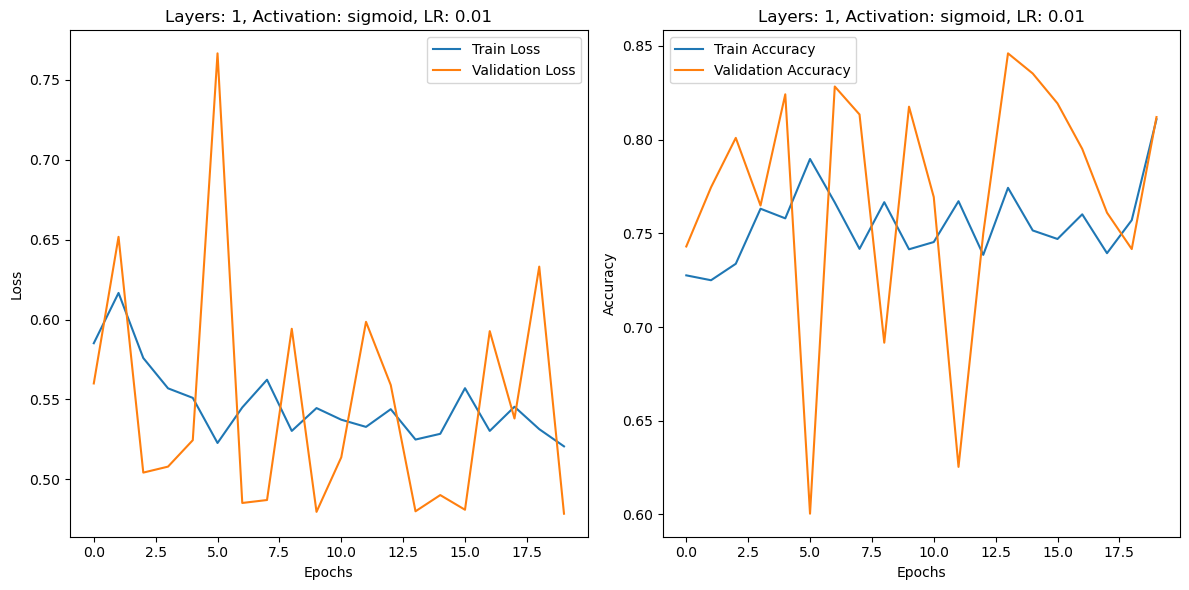

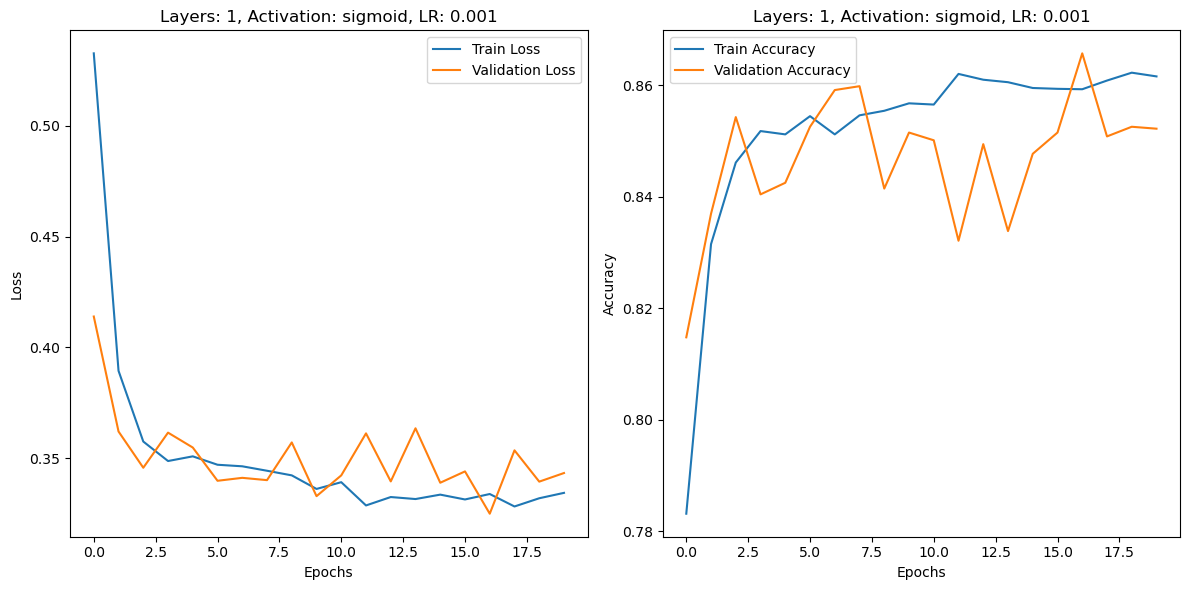

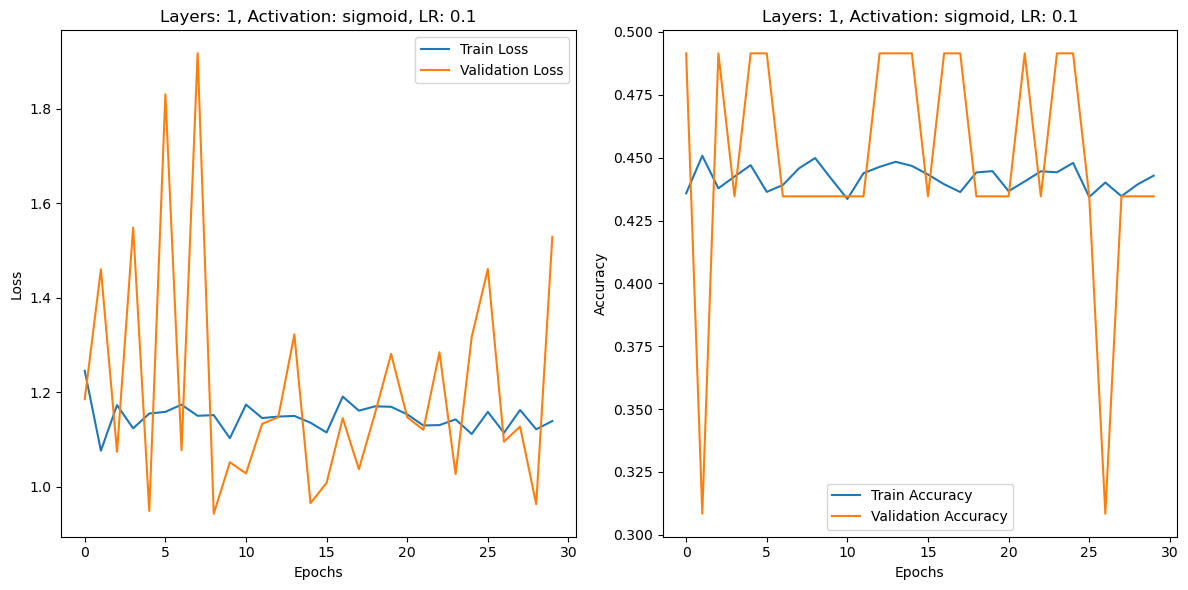

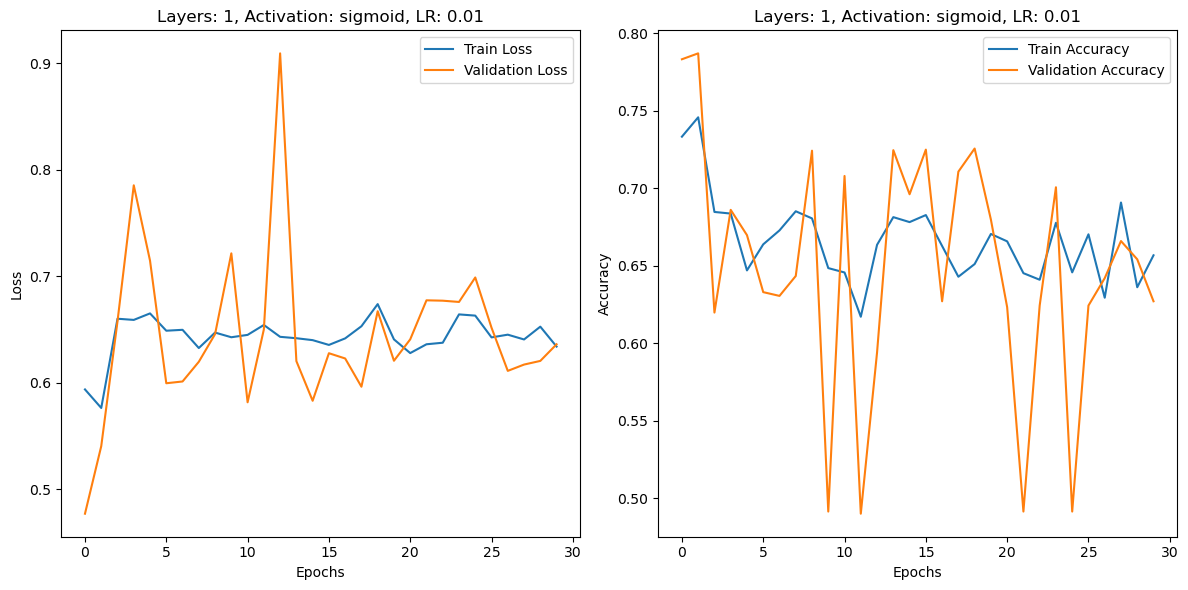

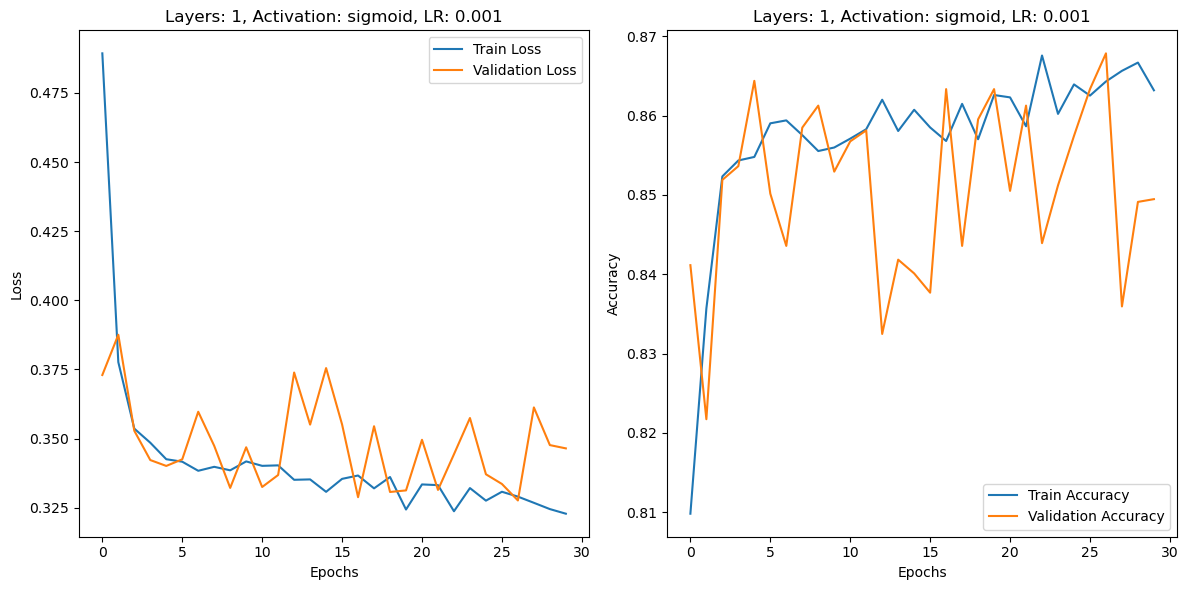

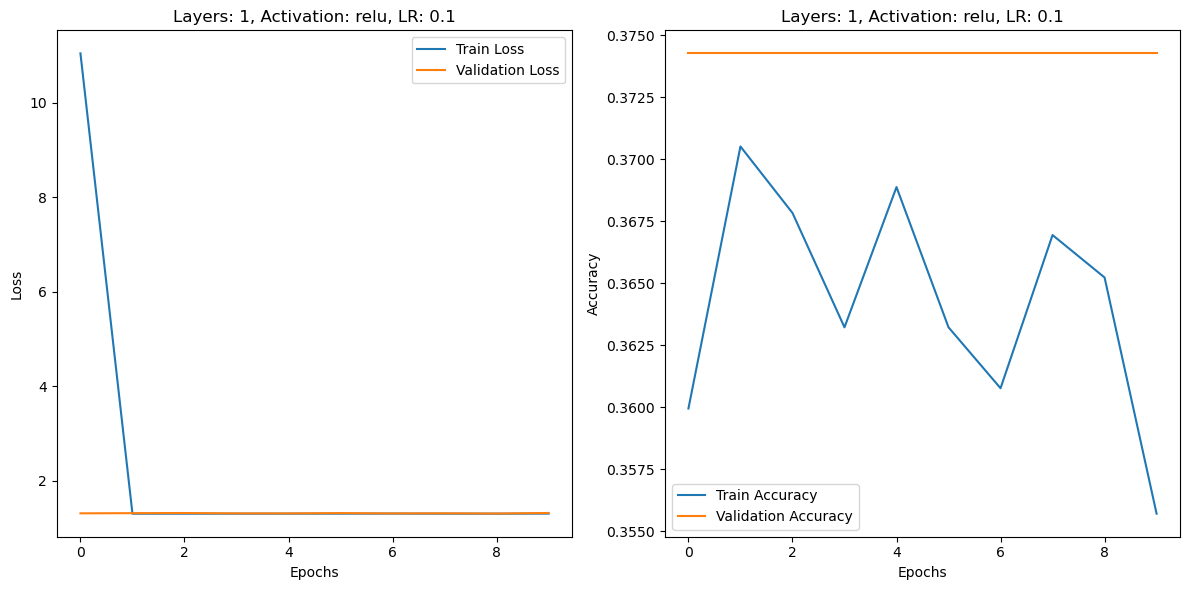

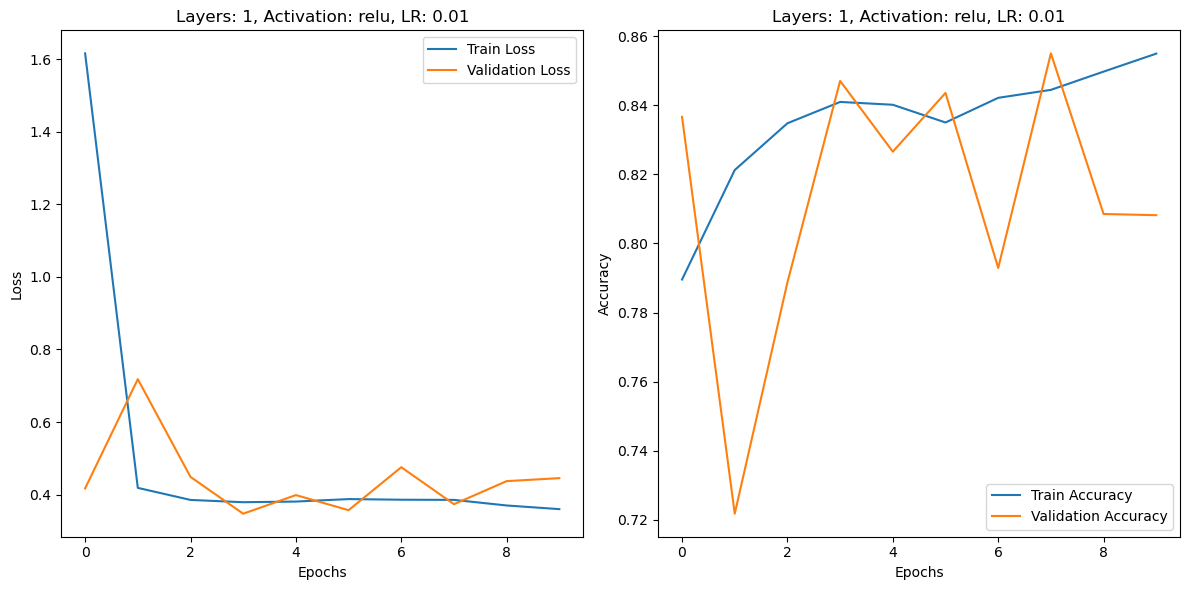

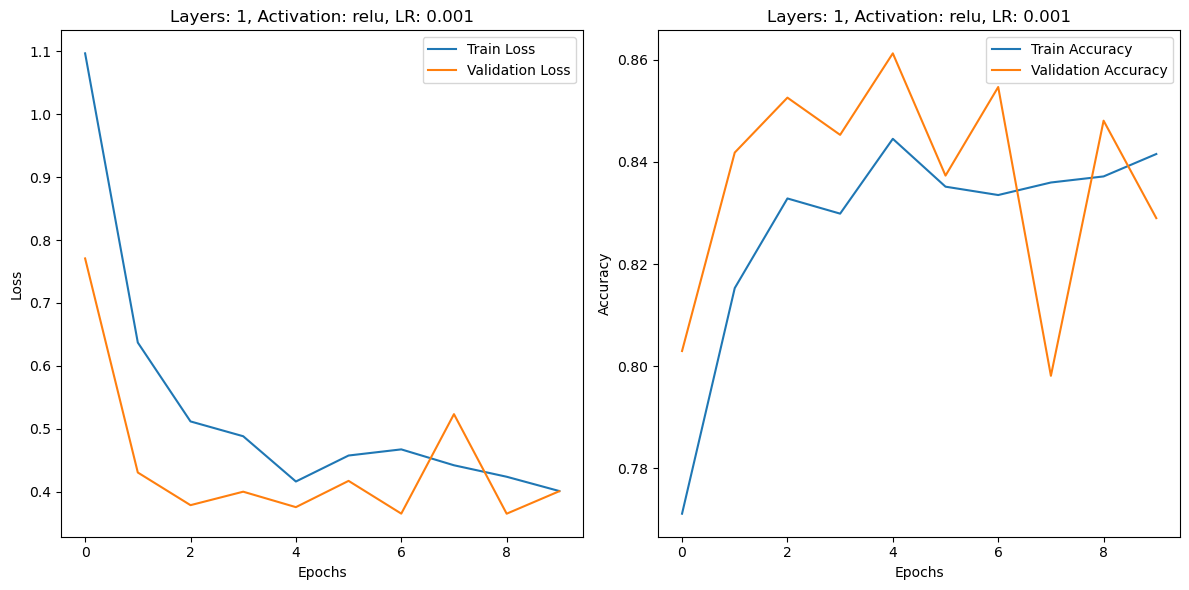

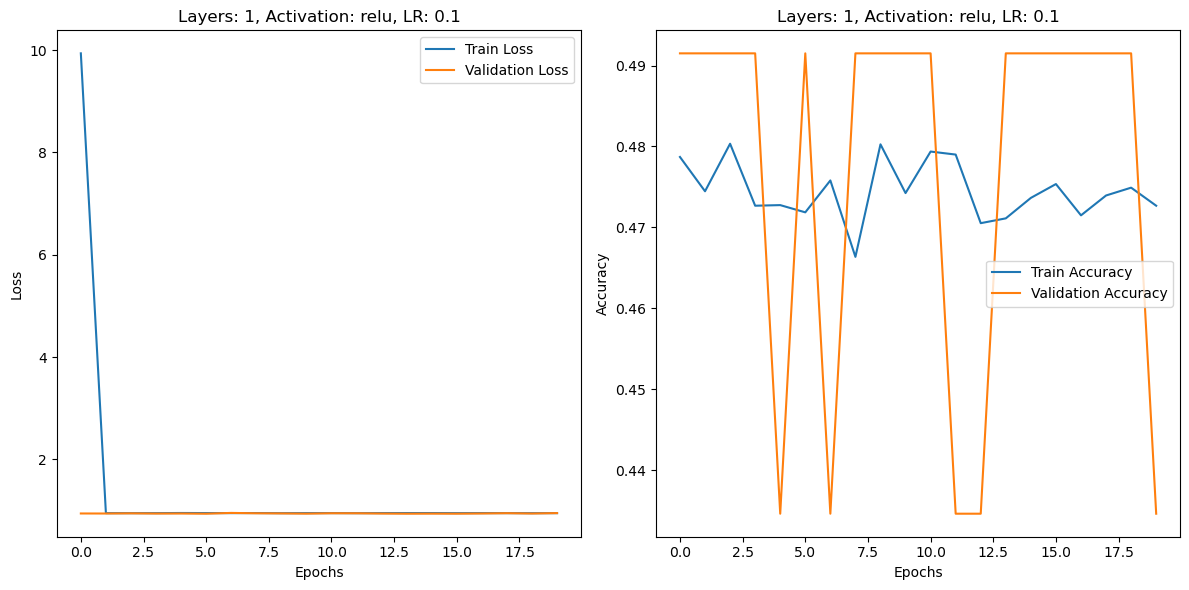

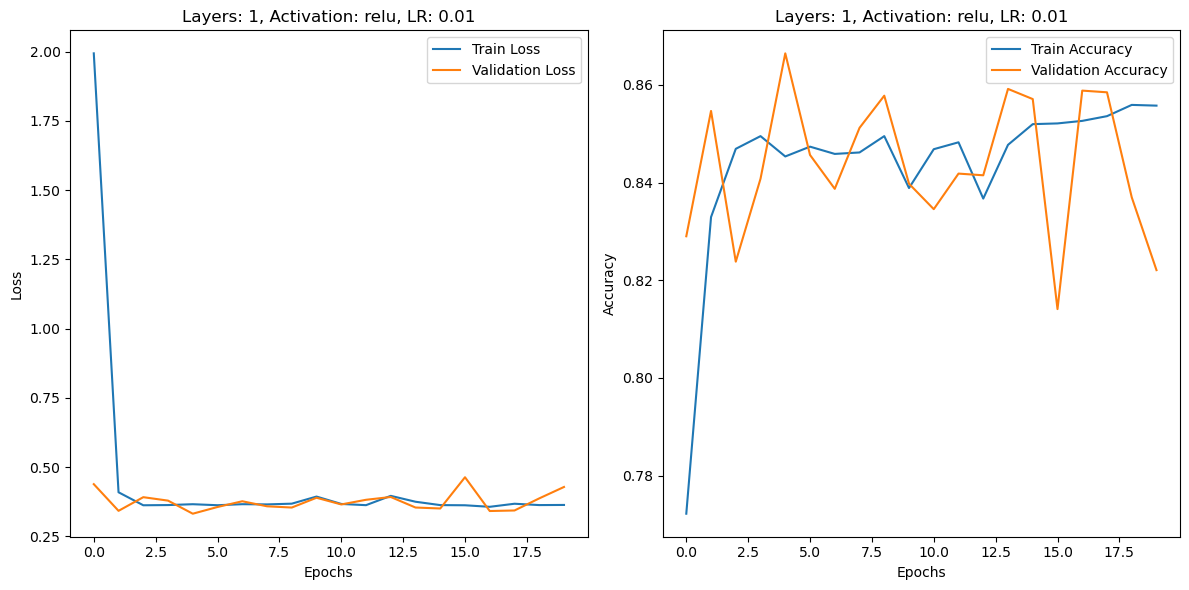

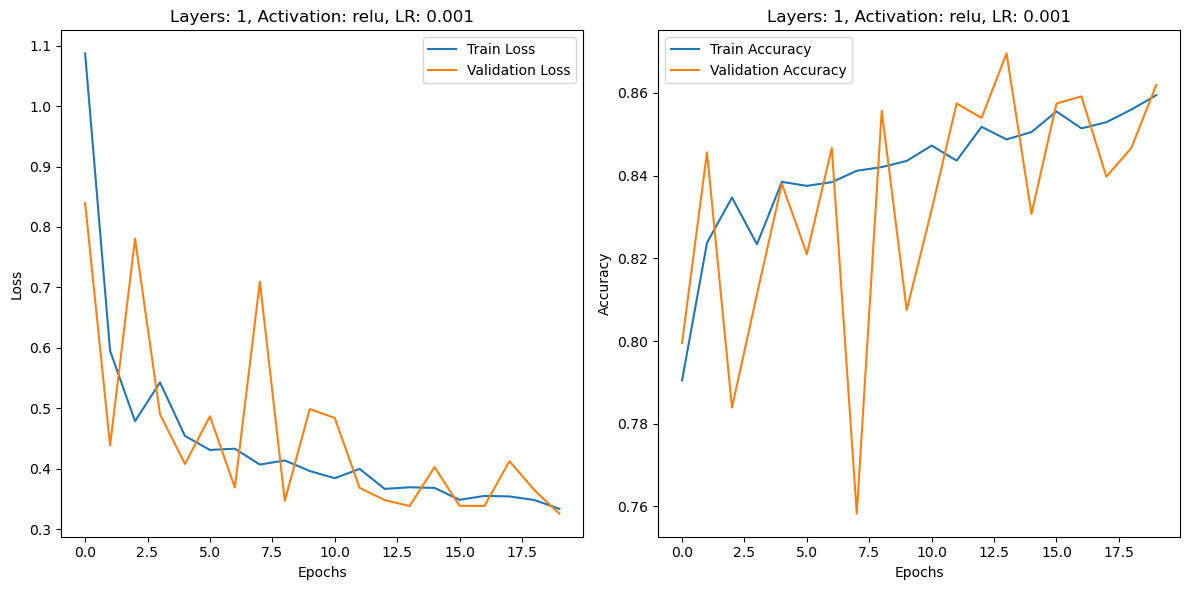

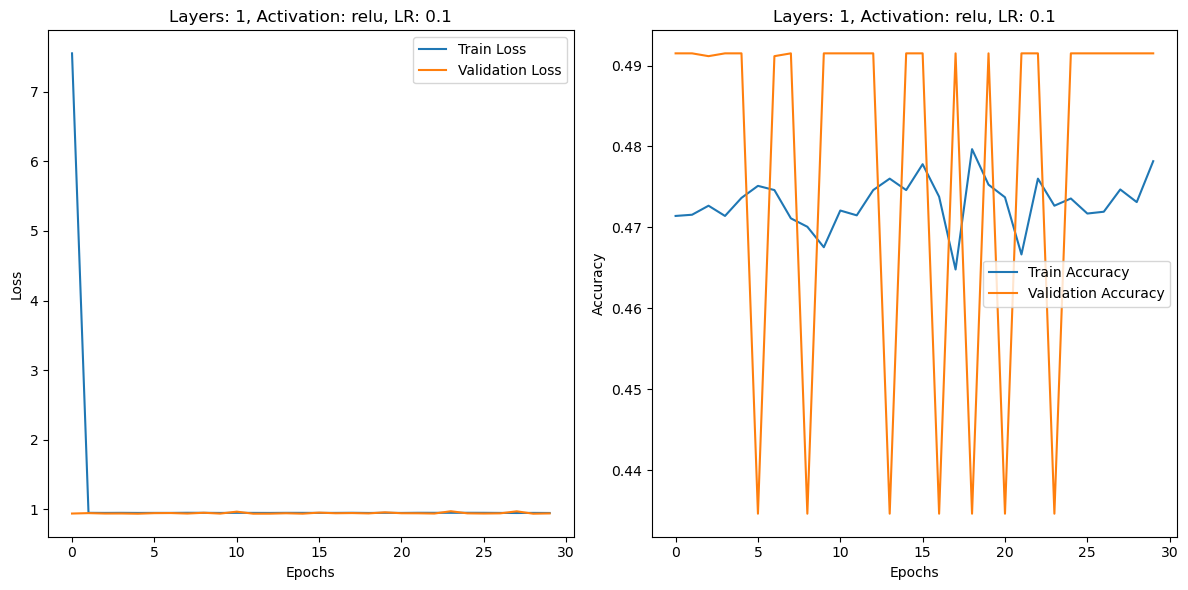

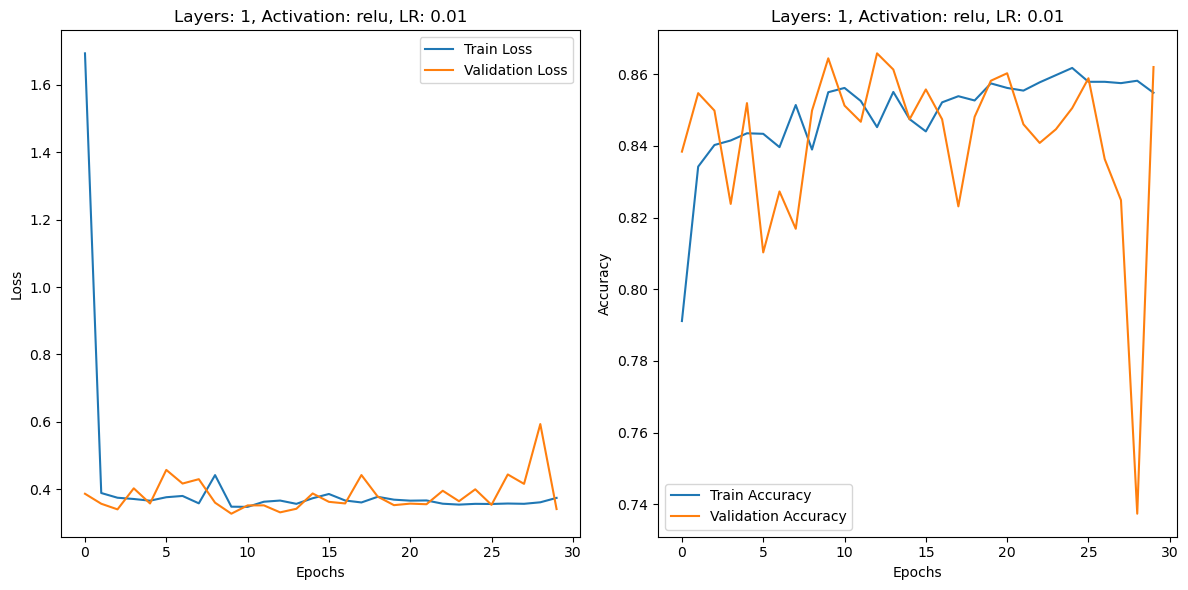

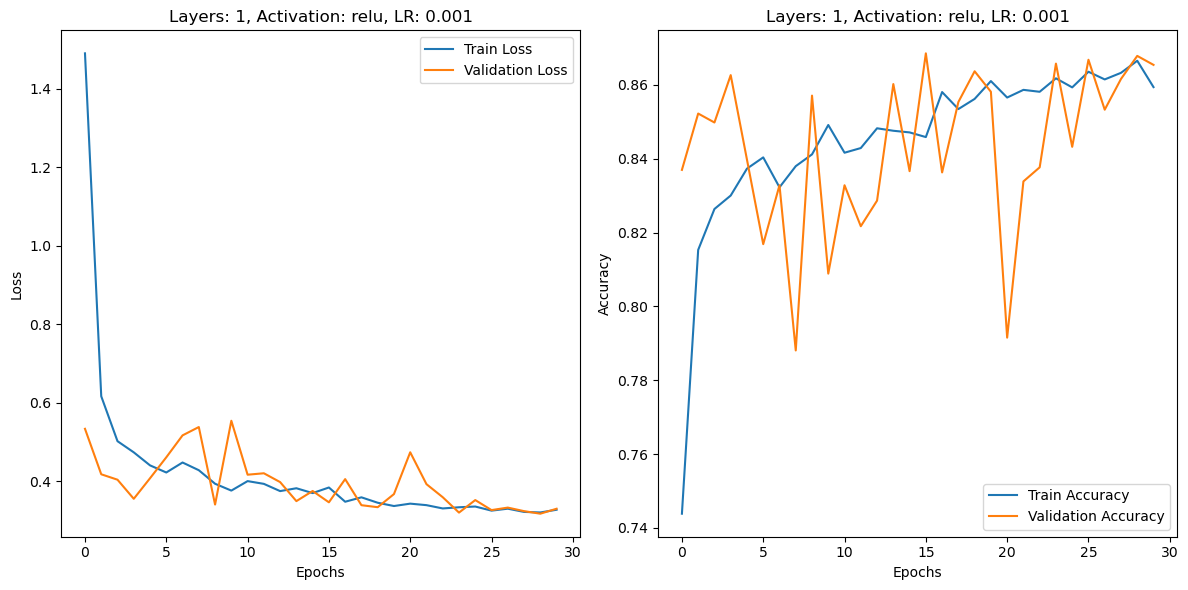

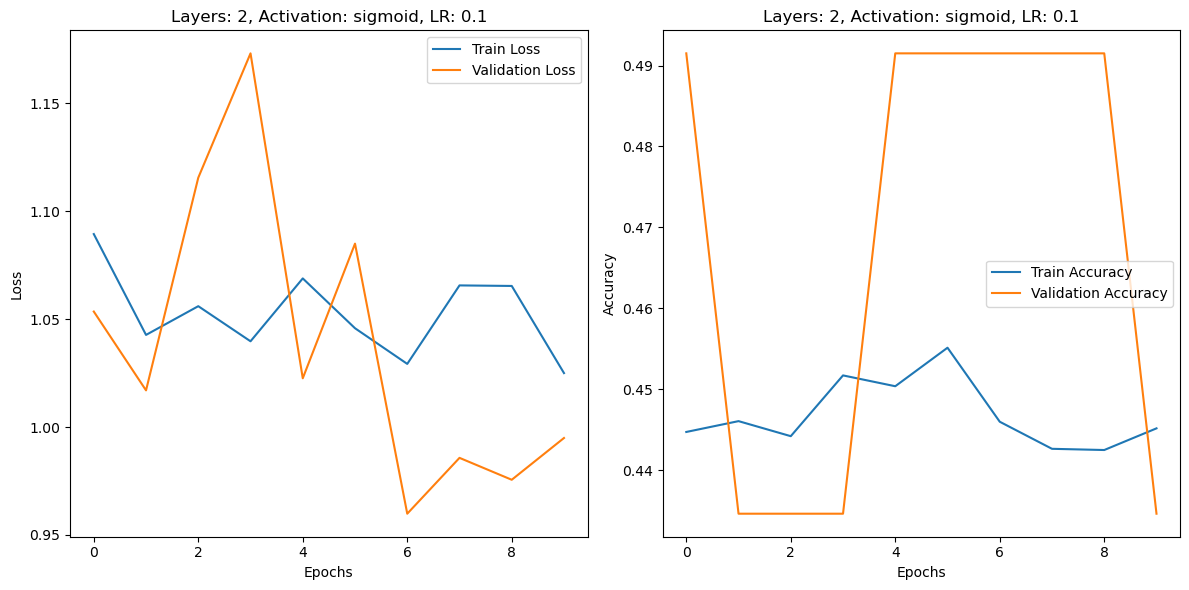

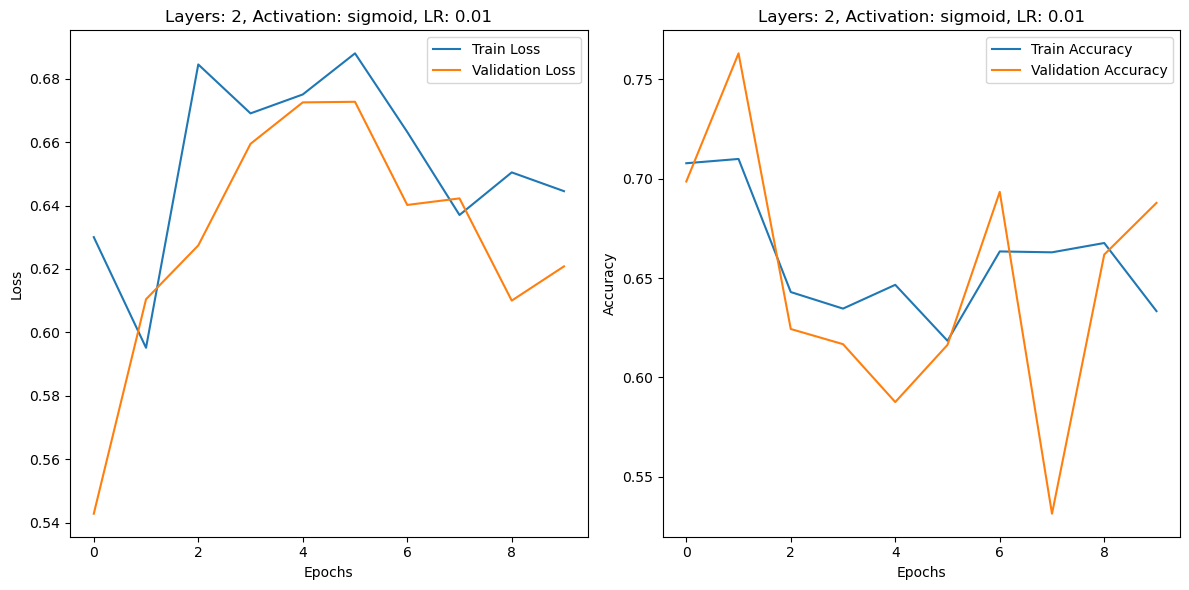

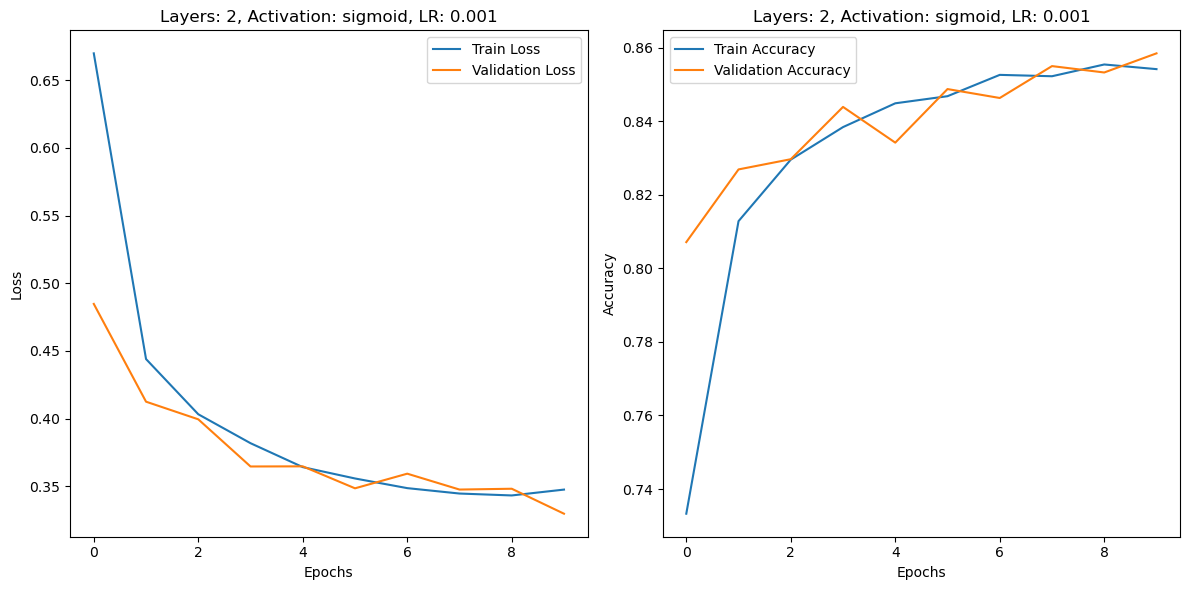

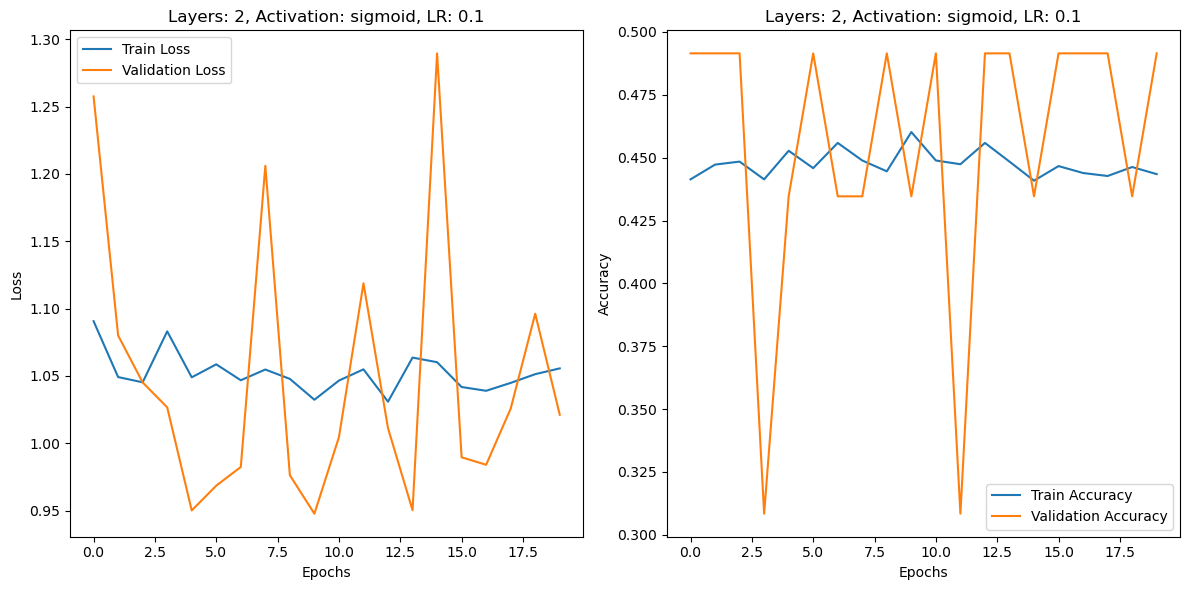

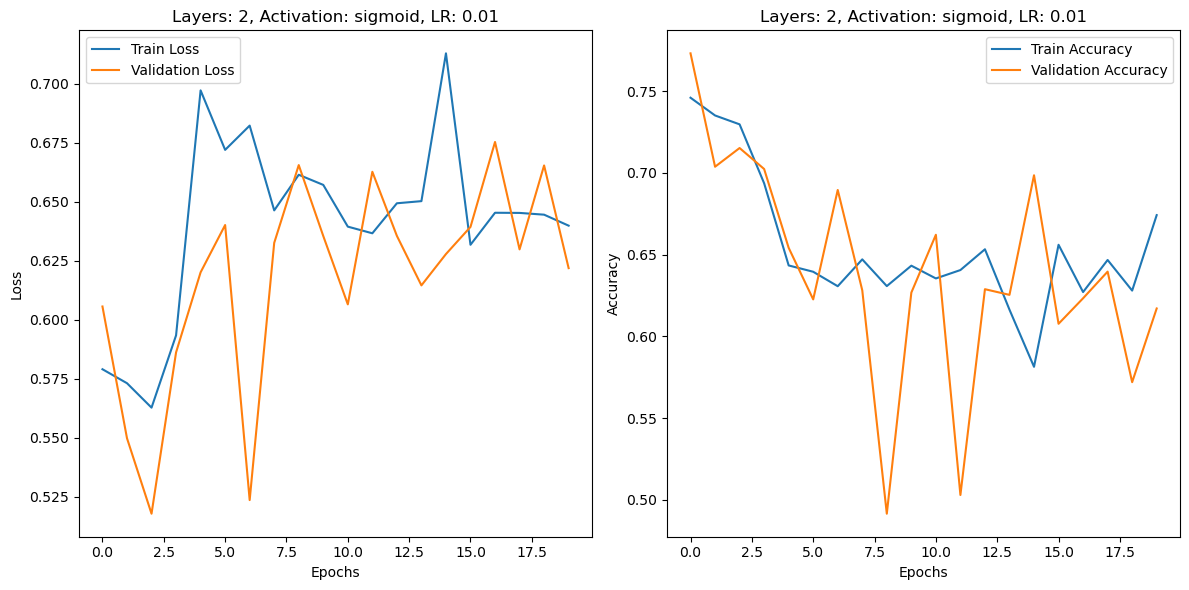

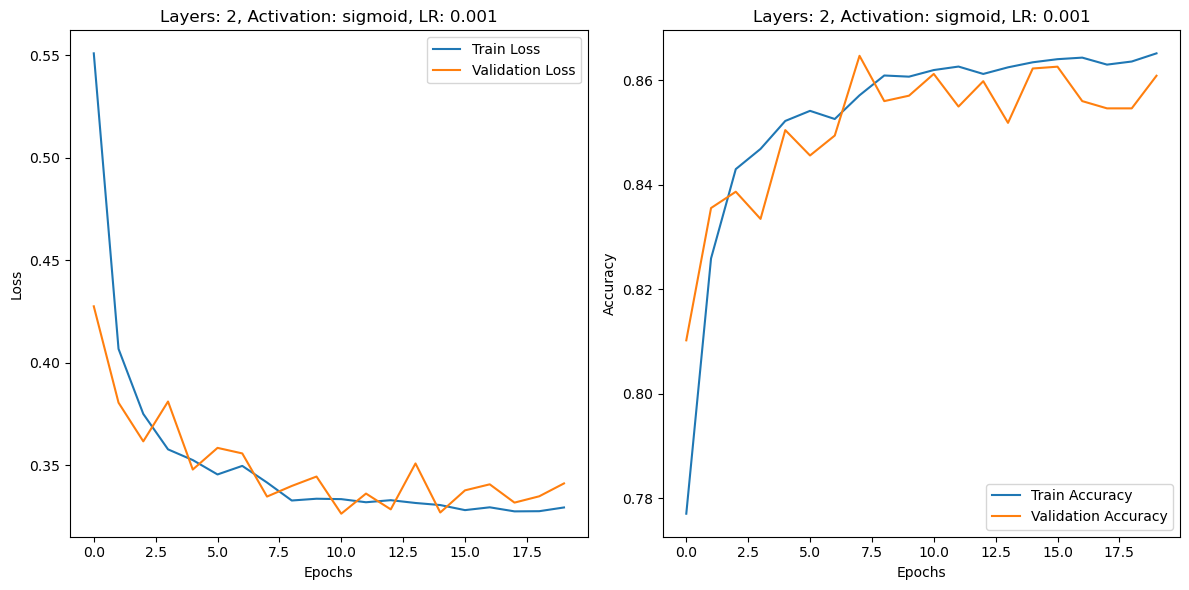

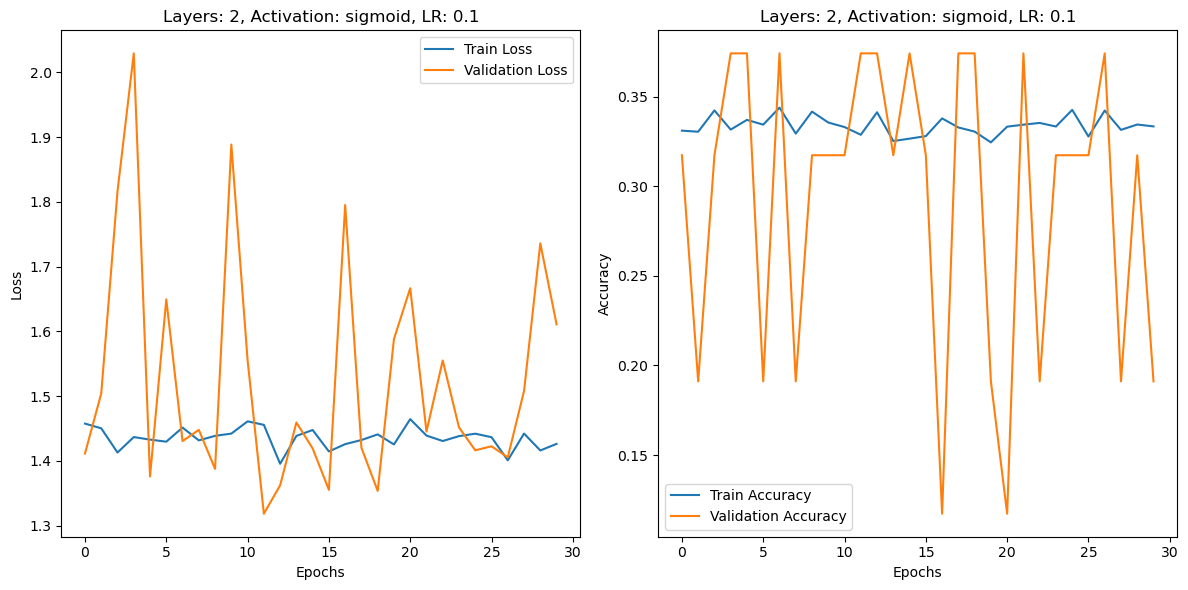

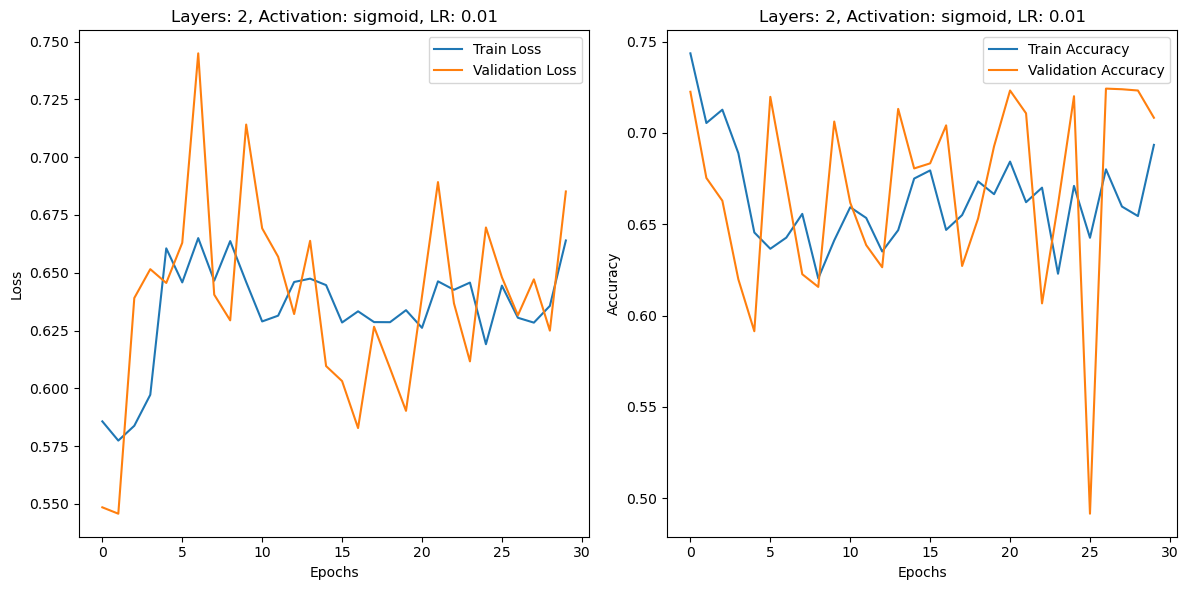

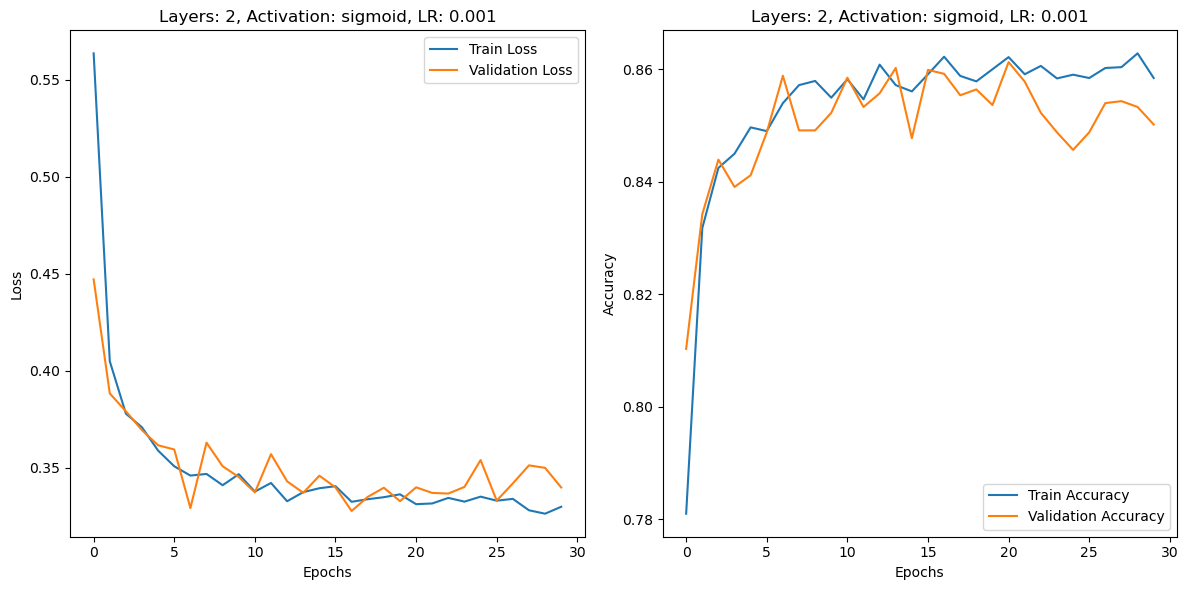

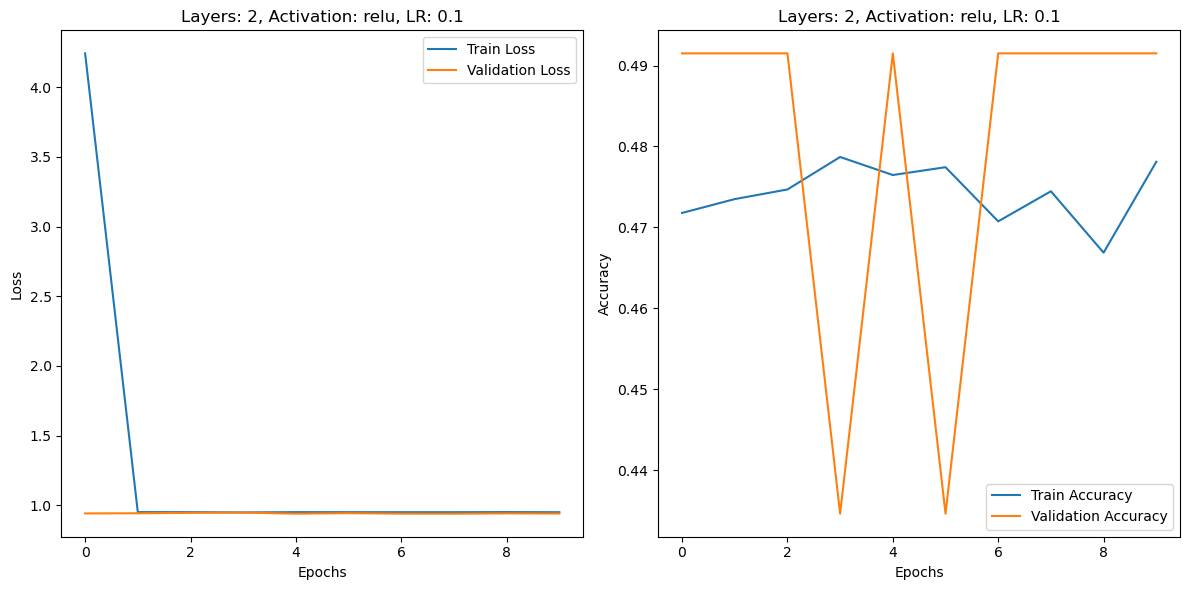

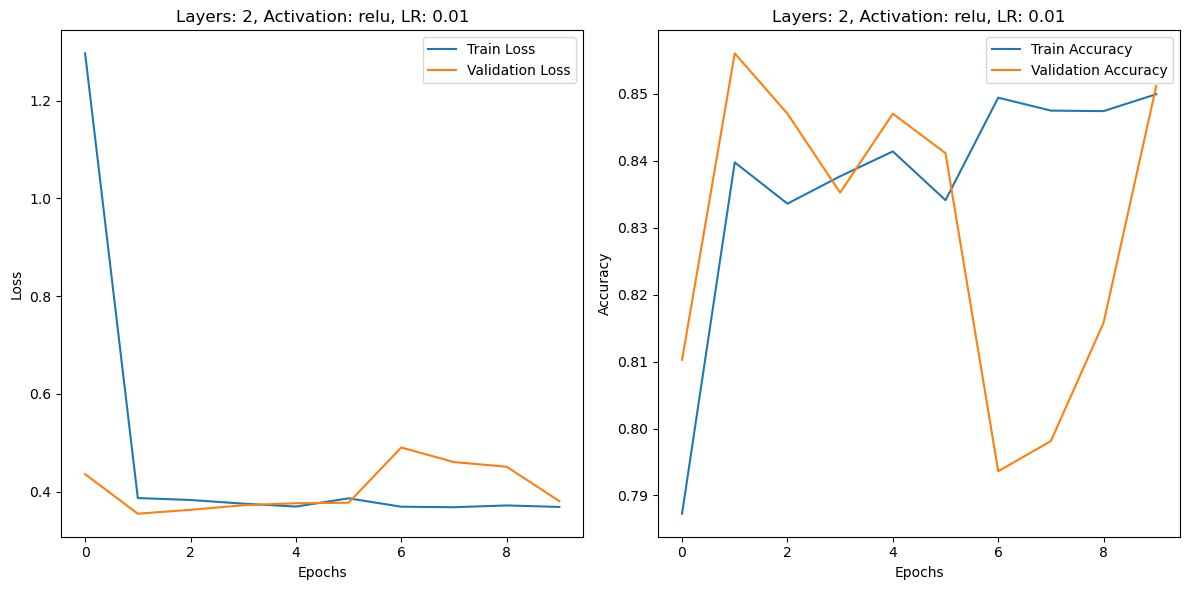

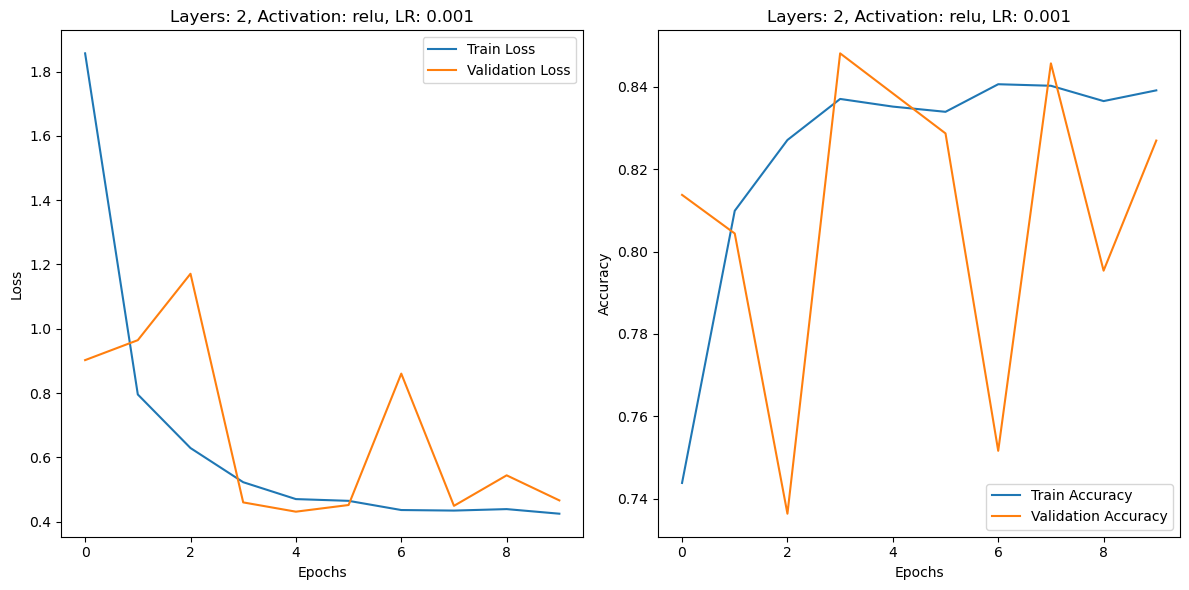

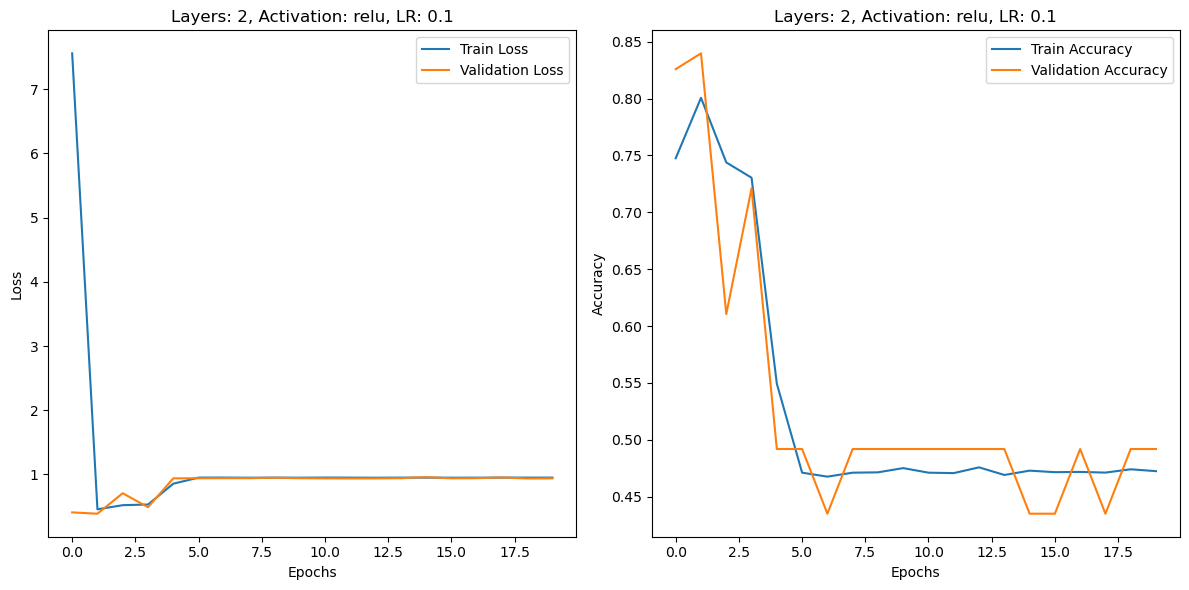

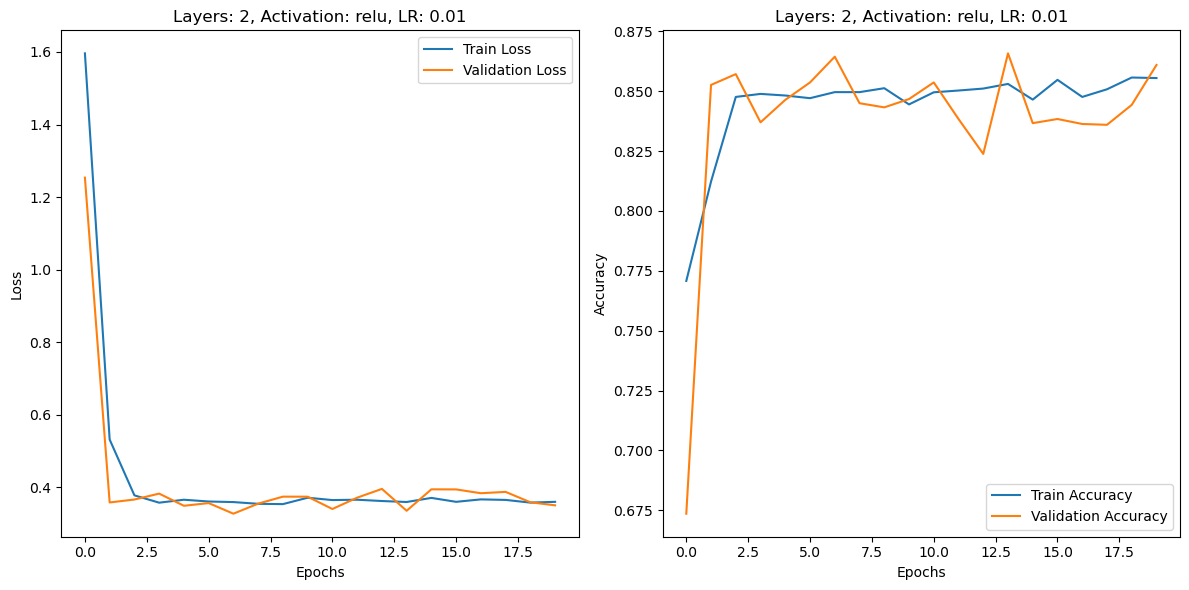

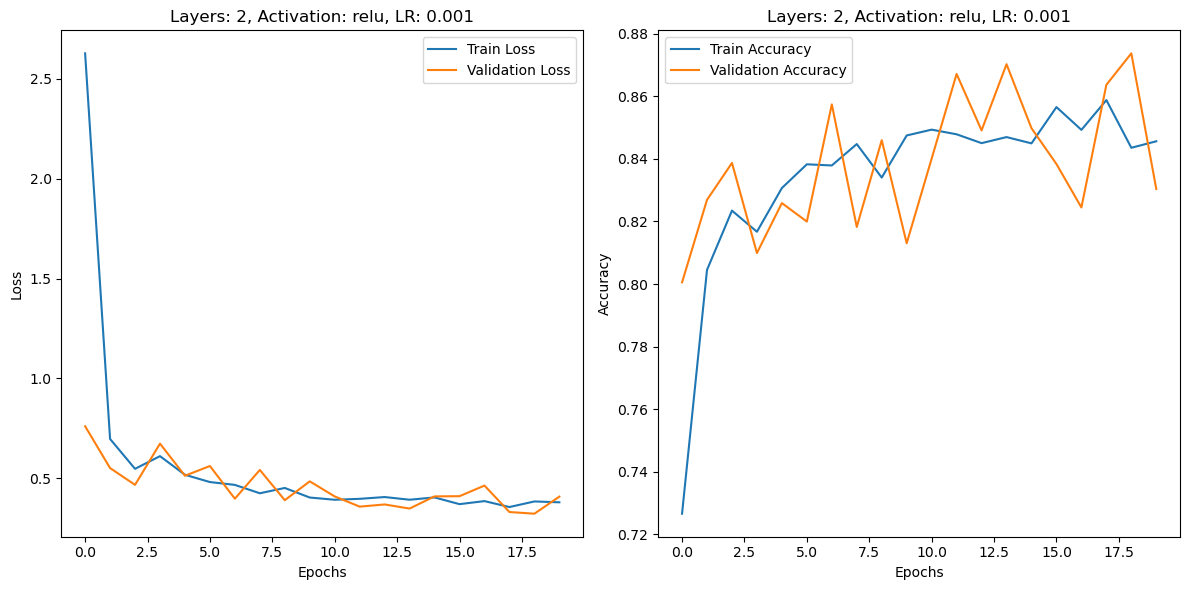

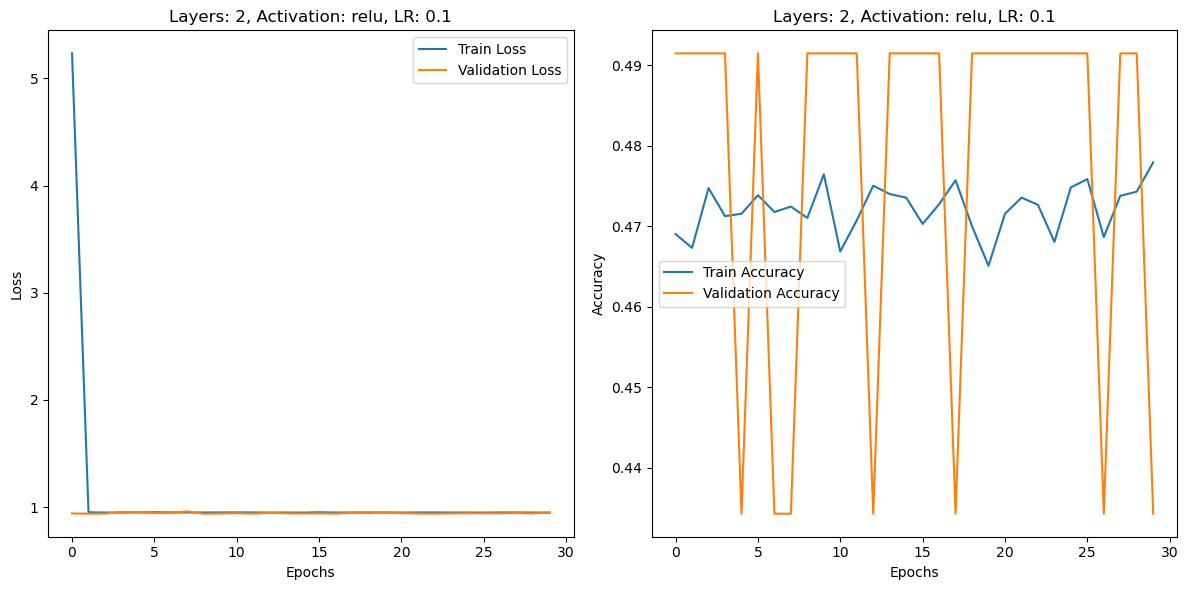

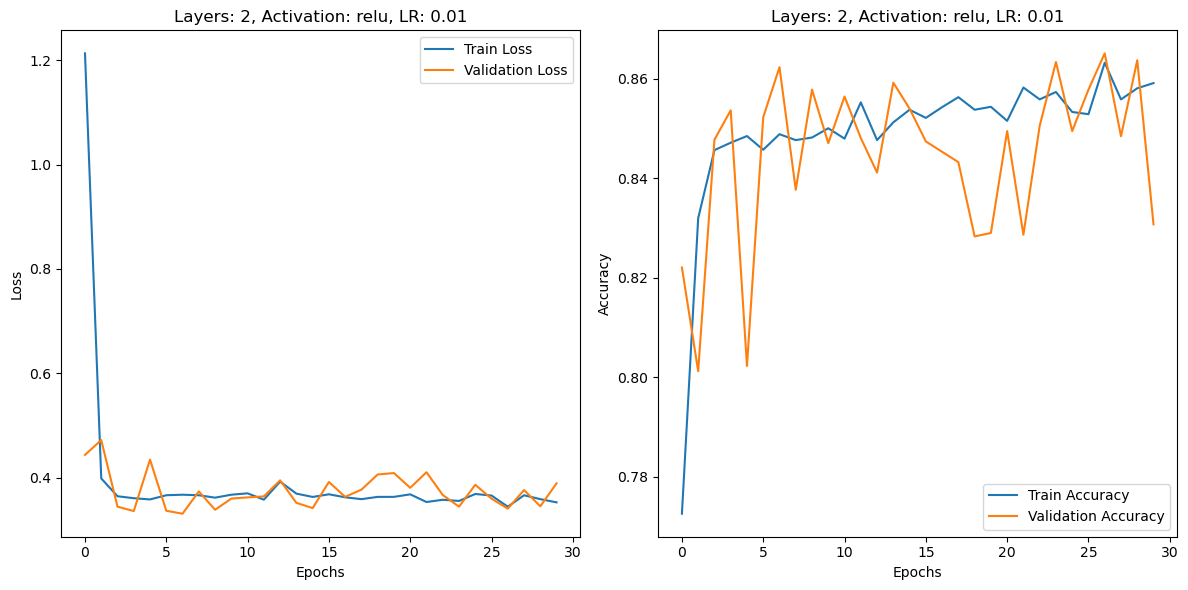

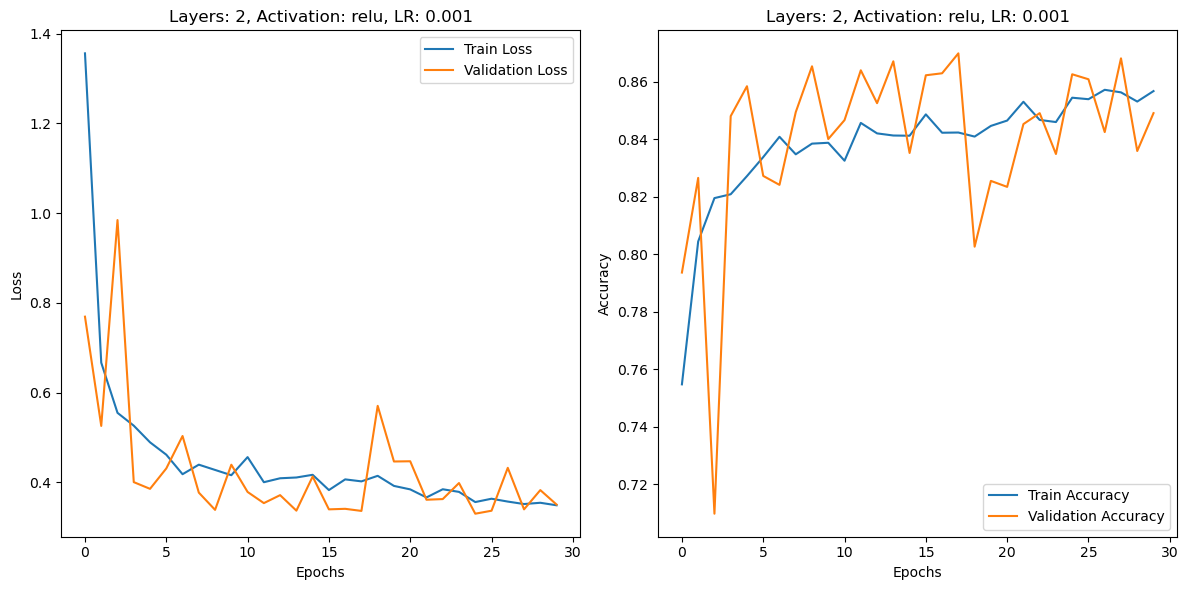

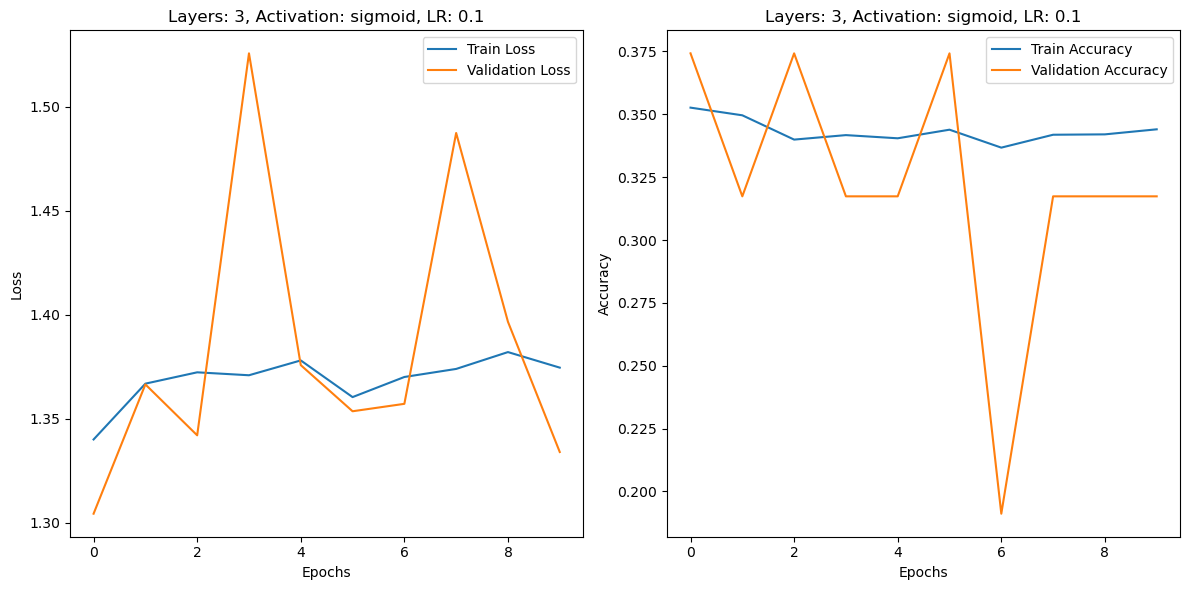

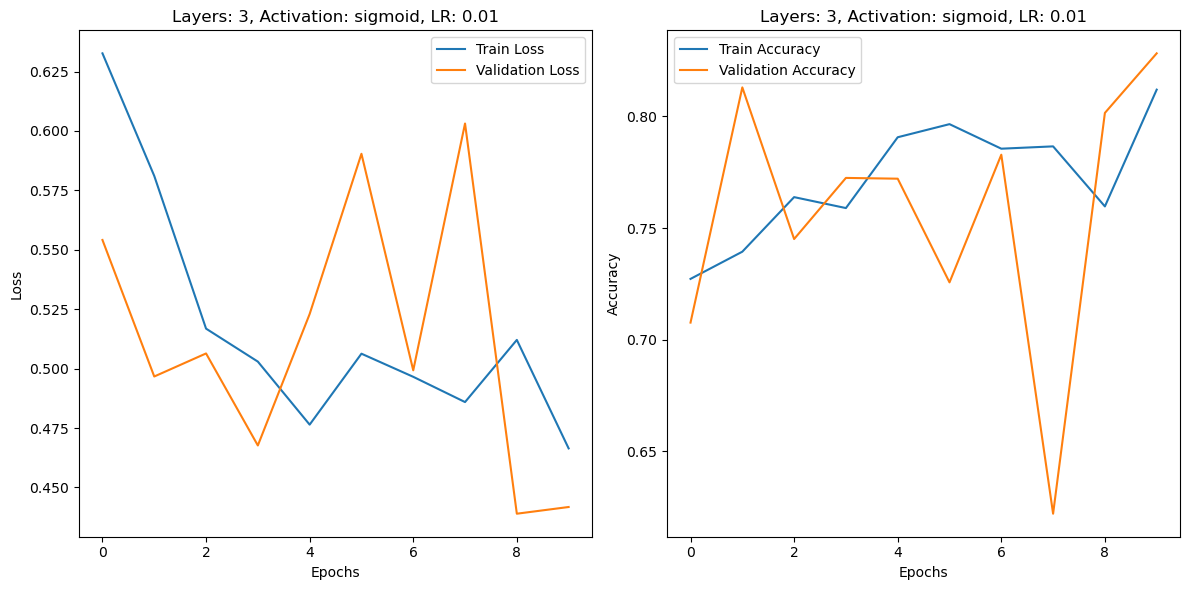

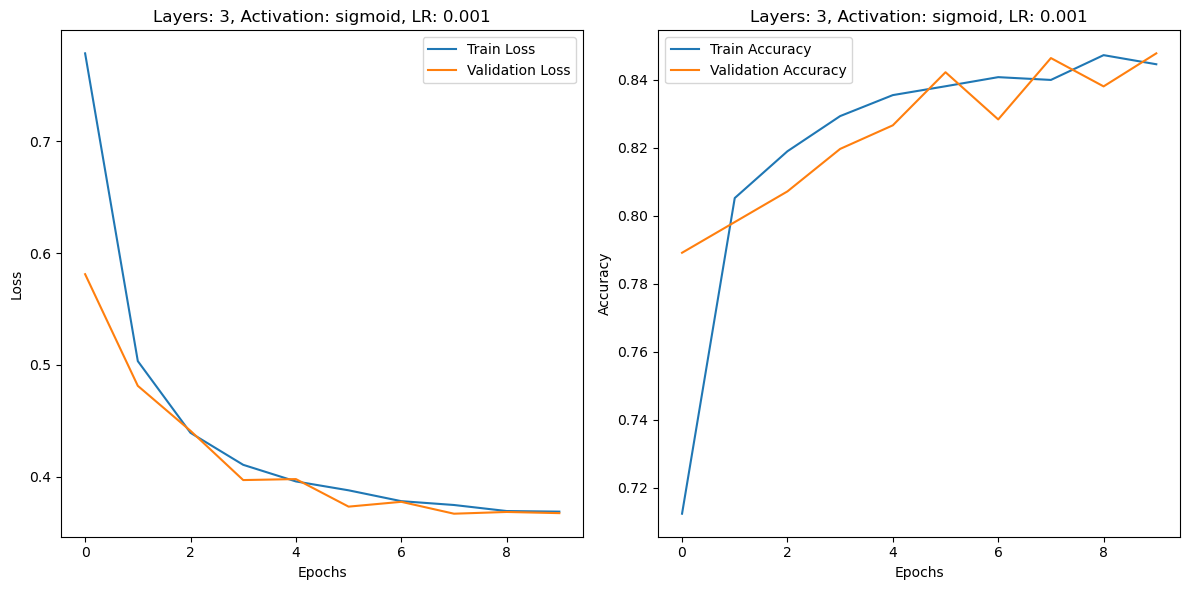

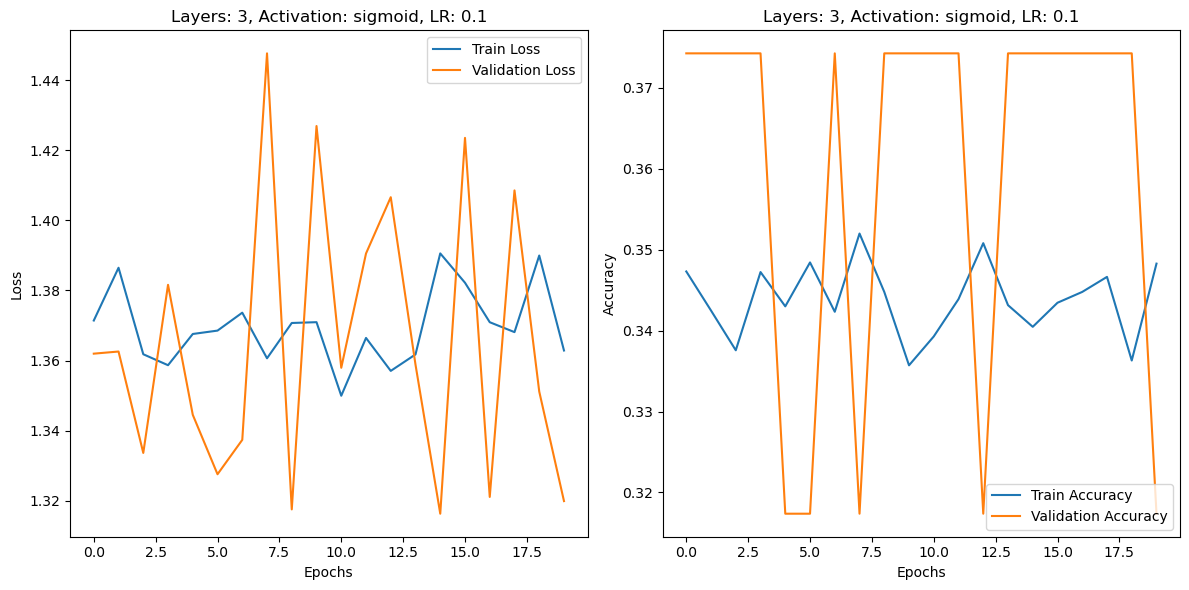

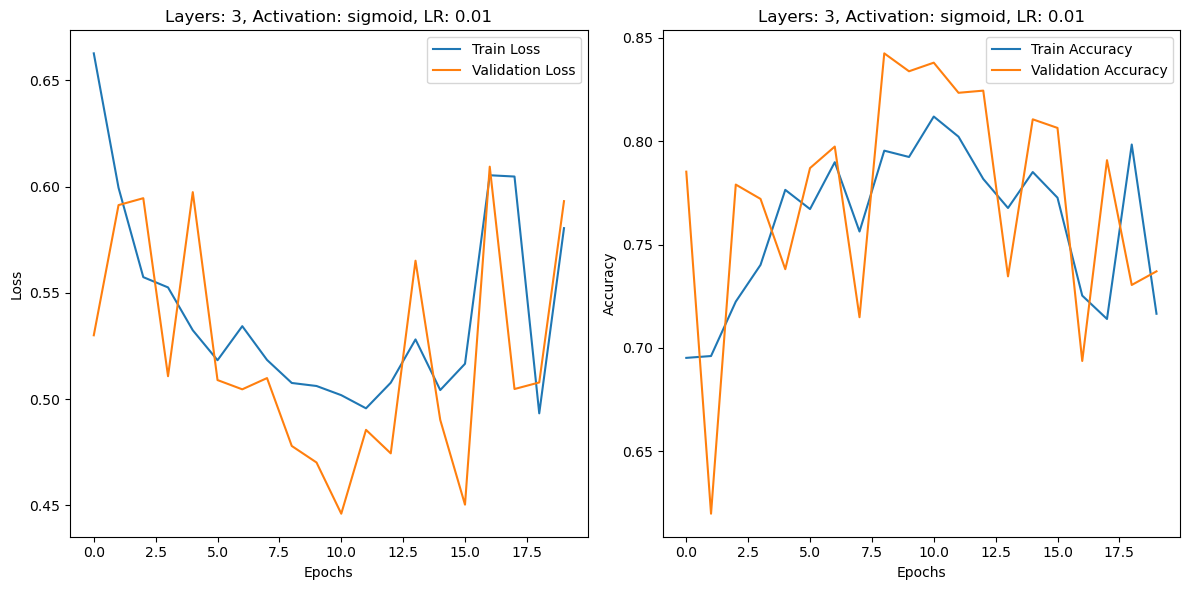

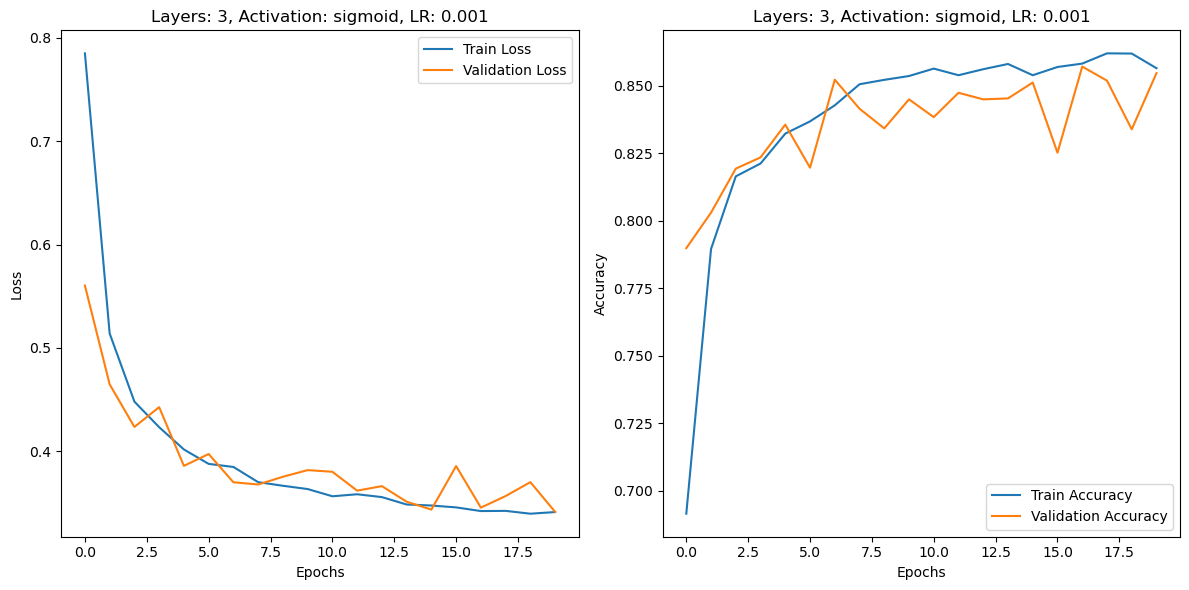

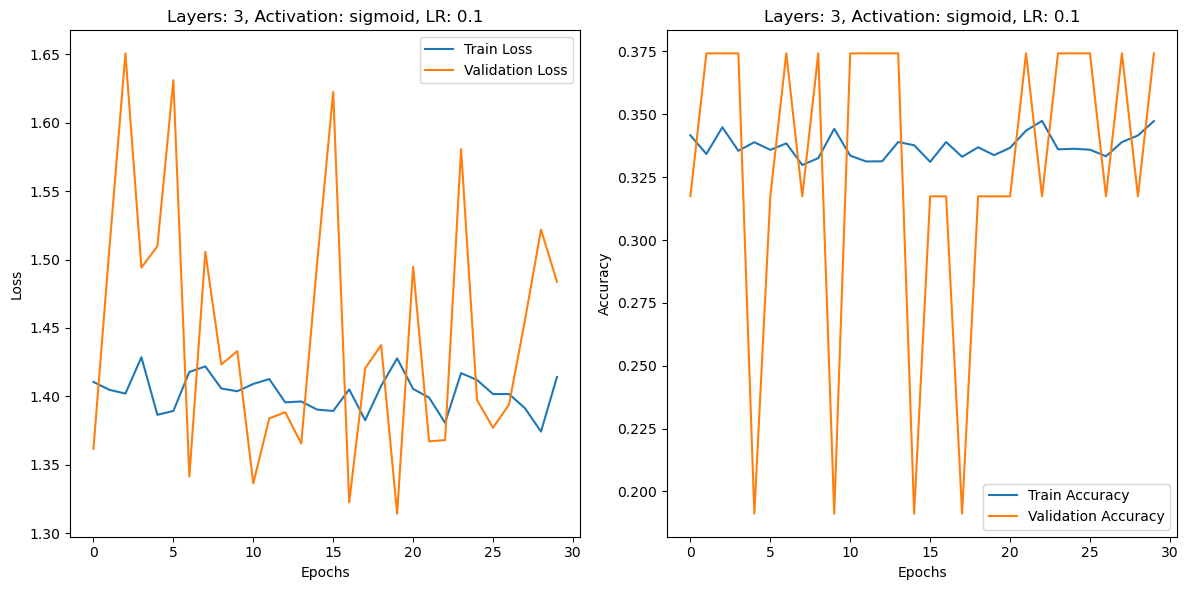

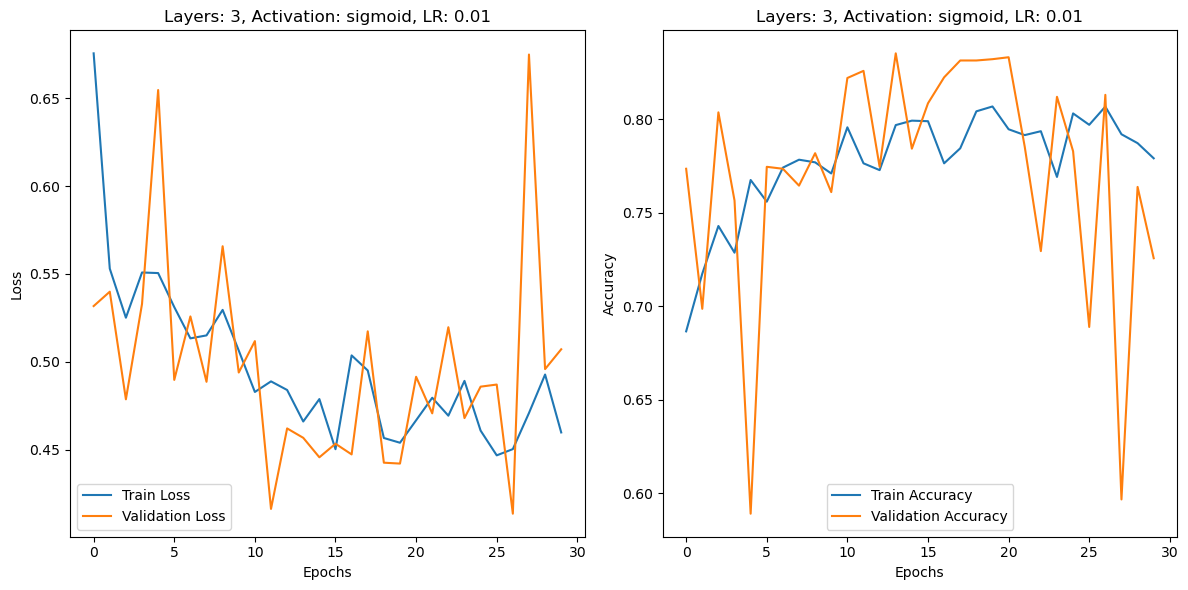

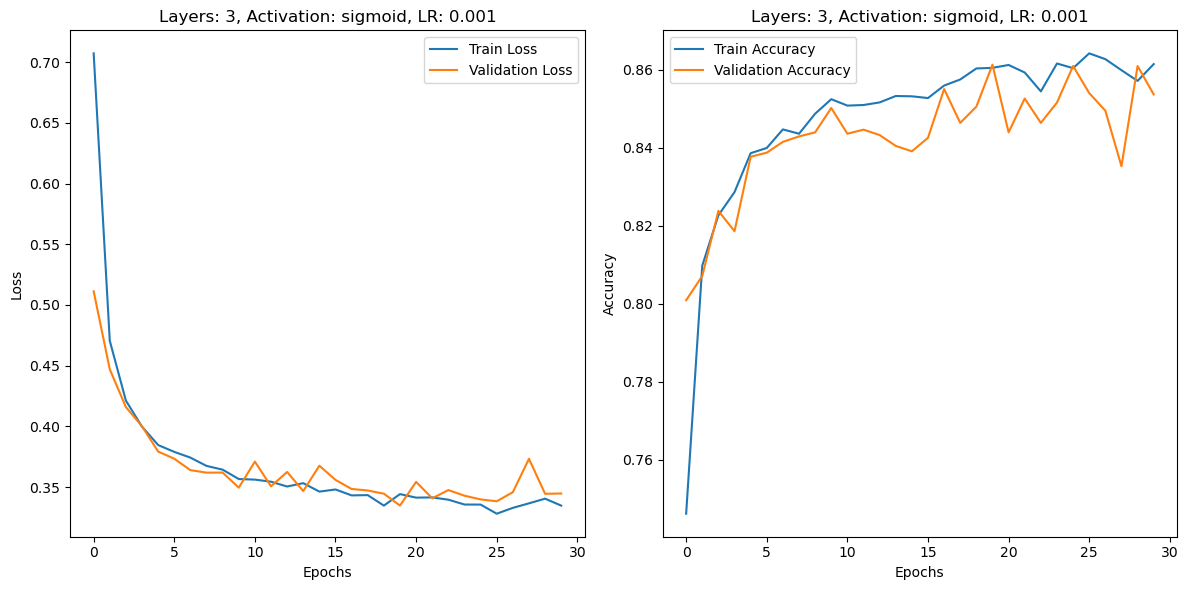

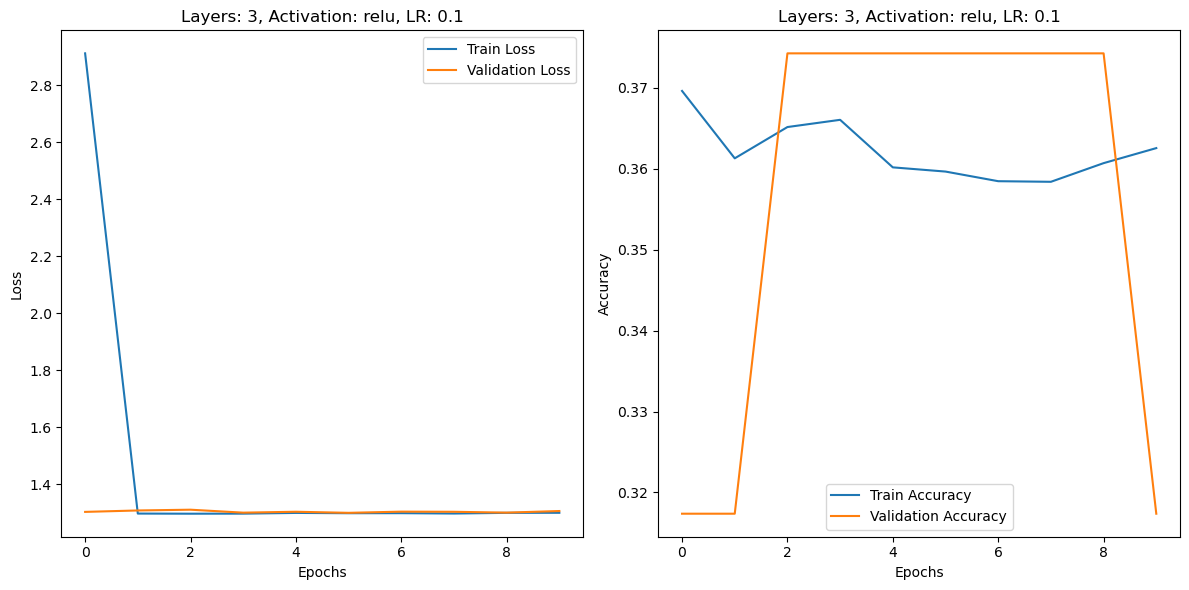

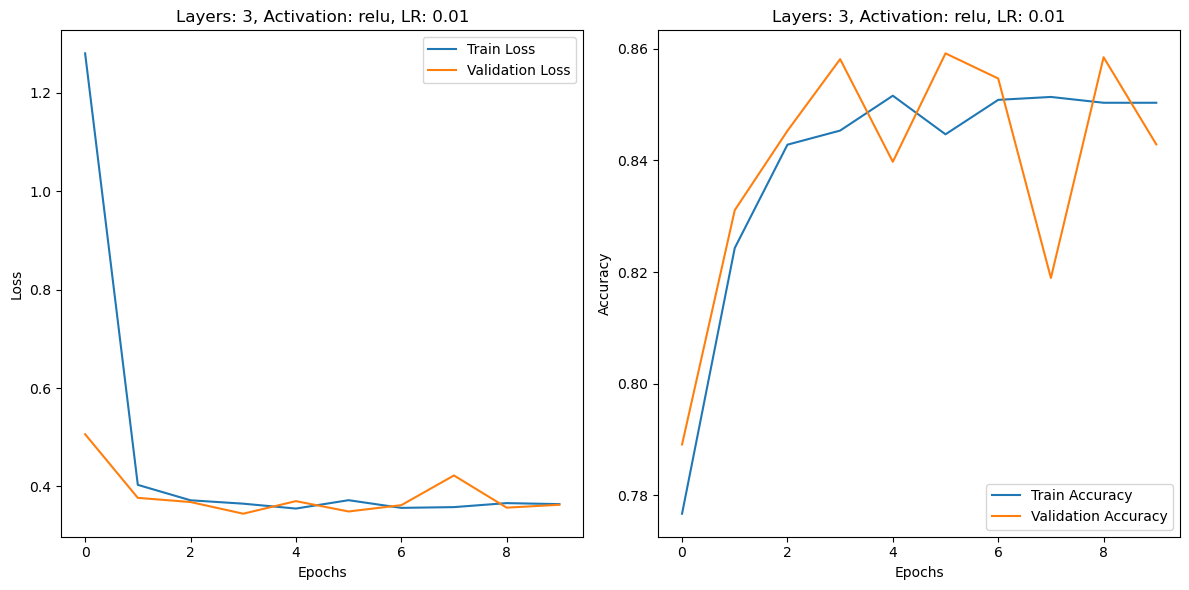

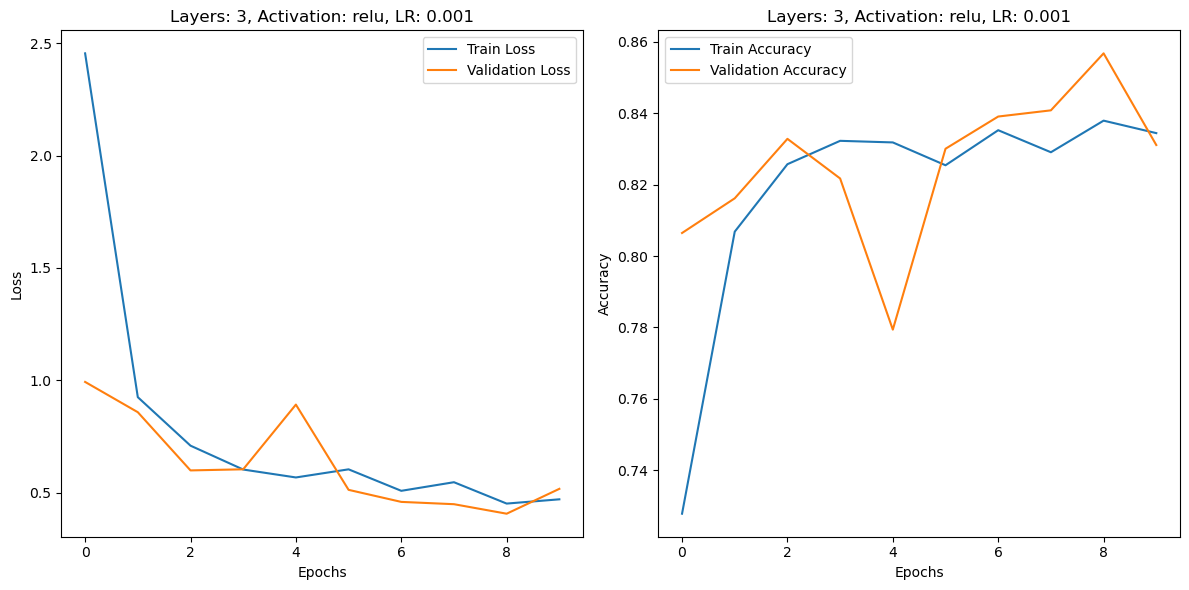

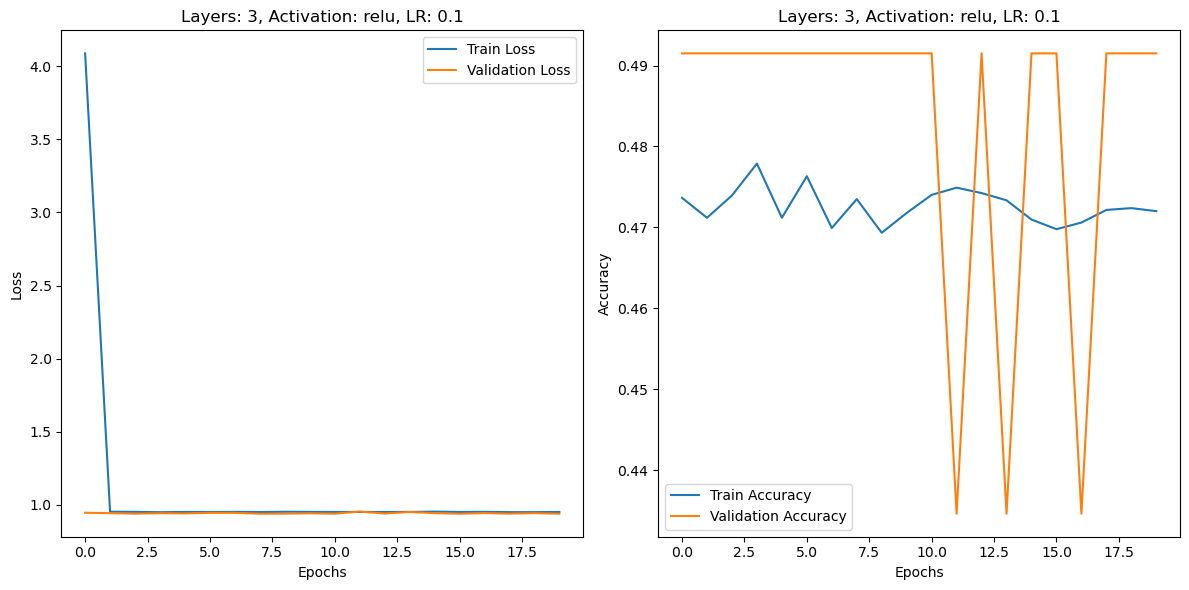

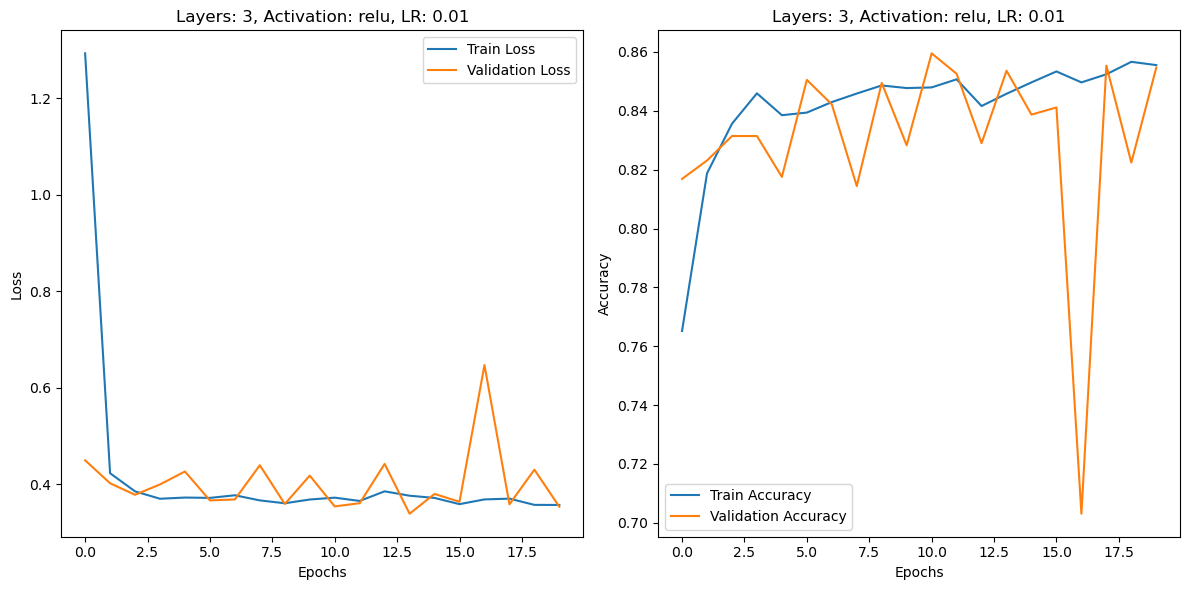

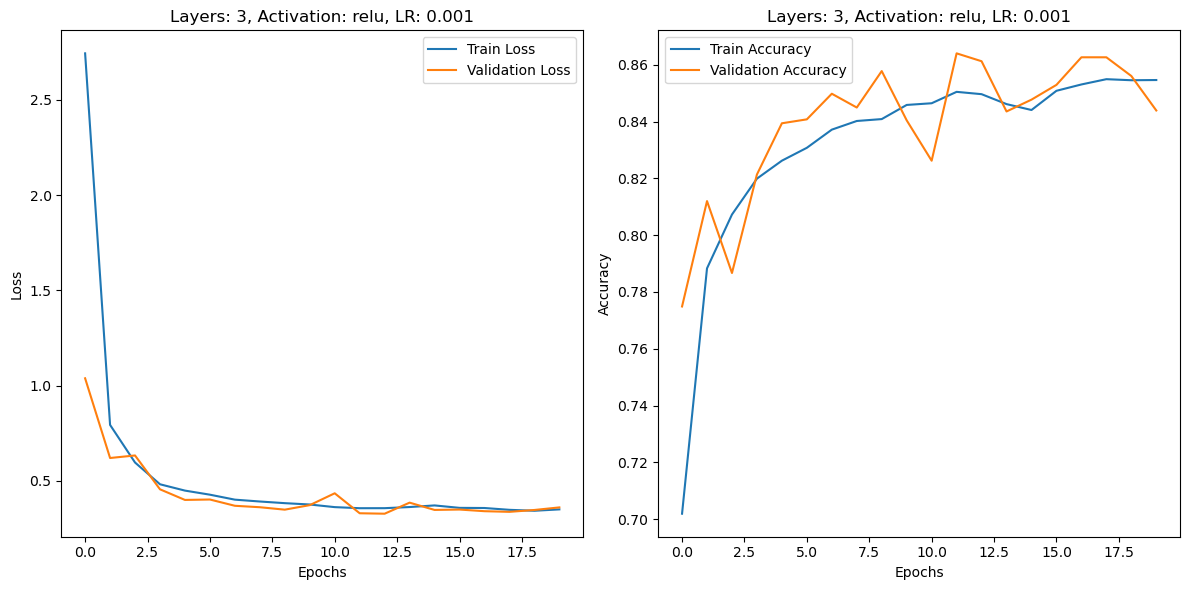

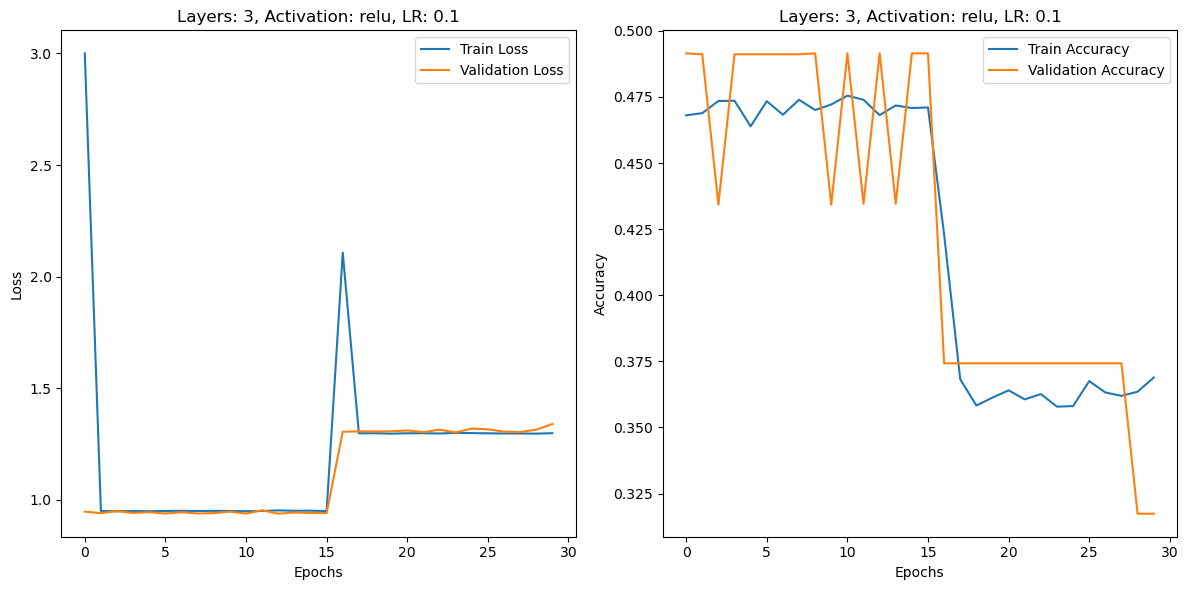

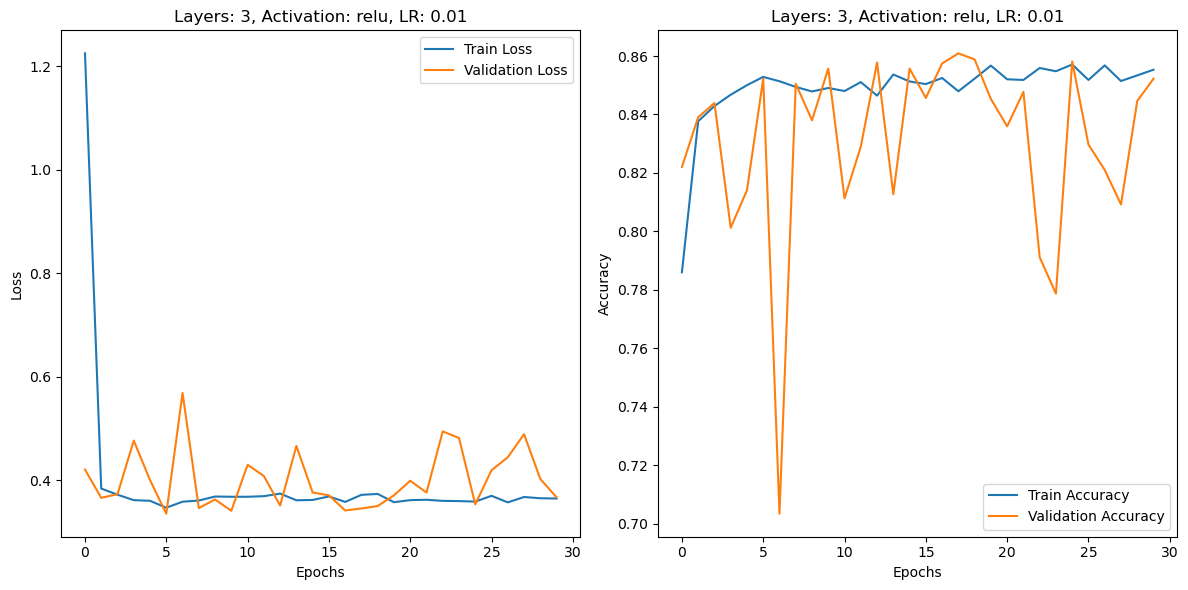

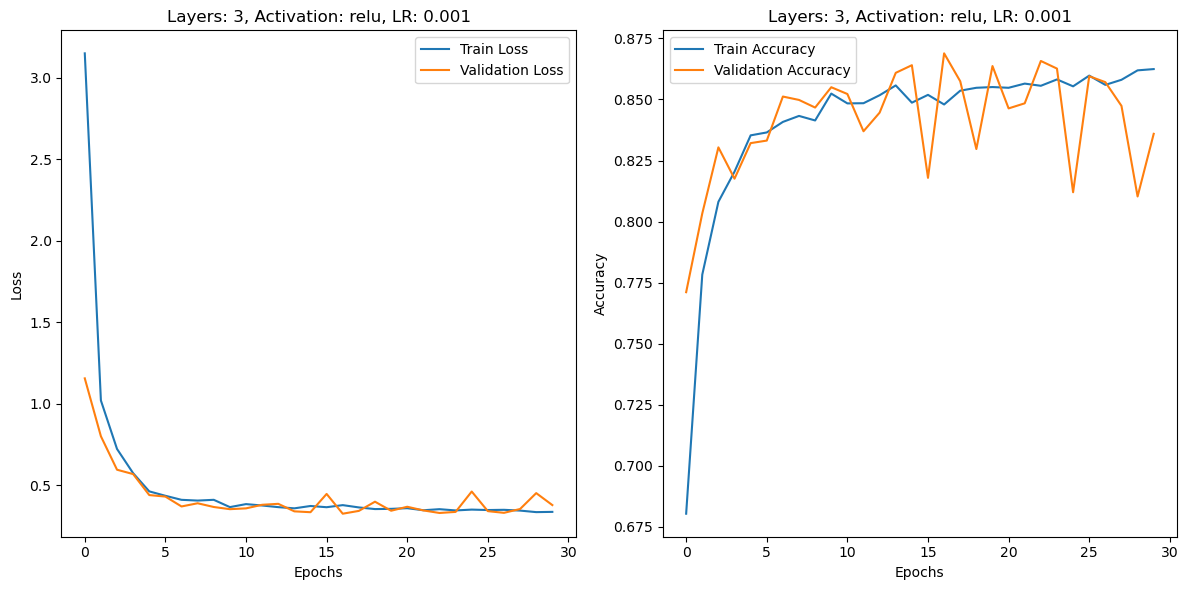

In [42]:
for data in plot_data:
    plt.figure(figsize=(12, 6))
    
    #plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(data['train_loss'], label='Train Loss')
    plt.plot(data['val_loss'], label='Validation Loss')
    plt.title(f'Layers: {data["layer"]}, Activation: {data["activation"]}, LR: {data["learning_rate"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    #plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(data['train_accuracy'], label='Train Accuracy')
    plt.plot(data['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Layers: {data["layer"]}, Activation: {data["activation"]}, LR: {data["learning_rate"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [44]:
#convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Layers', 'Activation', 'Epochs', 'Learning Rate', 'Loss', 'Accuracy', 'Precision', 'Recall'])

sorted_results_df = results_df.sort_values(by='Accuracy', ascending=False)

#get the top 5 best performing models
top_5_models = sorted_results_df.head(5)

print("Top 5 Best Performing Model Combinations:")
print(tabulate(top_5_models, headers='keys', tablefmt='grid'))


Top 5 Best Performing Model Combinations:
+----+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
|    |   Layers | Activation   |   Epochs |   Learning Rate |     Loss |   Accuracy |   Precision |   Recall |
+====+==========+==============+==========+=================+==========+============+=============+==========+
| 23 |        2 | sigmoid      |       20 |           0.001 | 0.299184 |   0.886501 |    0.889319 | 0.885399 |
+----+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
| 49 |        3 | relu         |       20 |           0.01  | 0.294319 |   0.885399 |    0.885146 | 0.883196 |
+----+----------+--------------+----------+-----------------+----------+------------+-------------+----------+
| 16 |        1 | relu         |       30 |           0.01  | 0.294738 |   0.885399 |    0.886489 | 0.882094 |
+----+----------+--------------+----------+-----------------+---------

In [45]:
#list to store the models
models = []

epochs = [10, 20, 30]
activations = ['sigmoid', 'relu']
learning_rates = [0.1, 0.01, 0.001]
layers = [1, 2, 3]
results = []
plot_data = []

for layer in layers:
    for activation in activations:
        for epoch in epochs:
            for learning_rate in learning_rates:
                model = Sequential()
                model.add(Input(shape=(num_features,), name='input'))
                if layer == 1:
                    model.add(Dense(128, activation=activation, name='hl1'))  
                elif layer == 2:
                    model.add(Dense(64, activation=activation, name='hl2'))  
                else:
                    model.add(Dense(32, activation=activation, name='hl3'))  
                model.add(Dense(4, activation='softmax', name='output'))  

                # Compiling the model
                opt = optimizers.Adam(learning_rate=learning_rate)
                model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])

                # Training the model using the training data
                history = model.fit(X_train, Y_train, epochs=epoch, batch_size=32, validation_split=15/85, verbose=0)

                # Store the model
                models.append(model)

                # Collecting plot data
                plot_data.append({
                    'layer': layer,
                    'activation': activation,
                    'epochs': epoch,
                    'learning_rate': learning_rate,
                    'train_loss': history.history['loss'],
                    'val_loss': history.history['val_loss'],
                    'train_accuracy': history.history.get('accuracy', []),
                    'val_accuracy': history.history.get('val_accuracy', [])
                })

                # Evaluating the model on the testing data
                loss, accuracy, precision, recall = model.evaluate(X_test, Y_test, batch_size=32)
        
                results.append([layer, activation, epoch, learning_rate, loss, accuracy, precision, recall])

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - accuracy: 0.4260 - loss: 1.4932 - precision_59: 0.4260 - recall_59: 0.4260
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.6839 - loss: 0.5376 - precision_60: 0.6839 - recall_60: 0.6839
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.8778 - loss: 0.2831 - precision_61: 0.8799 - recall_61: 0.8765
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.5115 - loss: 1.1943 - precision_62: 0.5115 - recall_62: 0.5115
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step - accuracy: 0.8684 - loss: 0.4030 - precision_63: 0.8684 - recall_63: 0.8684
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8832 - loss: 0.2777 - precision_64: 0.8832 - recall_64: 0.8832
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - accuracy: 0.5115 - loss: 1.2177 - precision_65: 0.5115 - recall_65: 0.5115
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.7561 - loss: 0.5664 - precision_66: 0.7559 - recall_66: 0.7553
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.8

In [46]:
from sklearn.metrics import classification_report
import numpy as np

#convert one-hot encoded test labels to class labels
y_true = np.argmax(Y_test, axis=1)

#generate and print classification reports for each model
for idx, model in enumerate(models):
    y_pred_prob = model.predict(X_test)
    
    y_pred = np.argmax(y_pred_prob, axis=1)
    
    print(f"Classification Report for Model {idx + 1}:")
    print(classification_report(y_true, y_pred, target_names=one_hot_encoder.get_feature_names_out(['Position'])))

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Model 1:
                     precision    recall  f1-score   support

  Position_Defender       0.35      1.00      0.52       563
   Position_Forward       0.00      0.00      0.00       315
Position_Goalkeeper       1.00      1.00      1.00       207
Position_Midfielder       0.00      0.00      0.00       730

           accuracy                           0.42      1815
          macro avg       0.34      0.50      0.38      1815
       weighted avg       0.22      0.42      0.27      1815

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report for Model 2:
                     precision    recall  f1-score   support

  Position_Defender       0.99      0.53      0.69       563
   Position_Forward       0.00      0.00      0.00       315
Position_Goalkeeper       1.00      1.00      1.00       207
Position_Midfielder       0.56      1.00      0.72       730

           accuracy                           0.68    